# Análisis BD ventas




In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

In [8]:
pd.set_option('display.max_rows', None)

In [9]:
# Carga
path = '/content/data.xlsx'
ordenes = pd.read_excel(path, sheet_name='Ordenes')
region = pd.read_excel(path, sheet_name='Region')
producto = pd.read_excel(path, sheet_name='Producto')

In [10]:
print("INFORMACIÓN GENERAL DEL DATASET")
print("-"*80)
print(f"\nDimensiones ordenes: {ordenes.shape[0]} filas x {ordenes.shape[1]} columnas")
print(f"\nDimensiones region: {region.shape[0]} filas x {region.shape[1]} columnas")
print(f"\nDimensiones producto: {producto.shape[0]} filas x {producto.shape[1]} columnas")

INFORMACIÓN GENERAL DEL DATASET
--------------------------------------------------------------------------------

Dimensiones ordenes: 51290 filas x 14 columnas

Dimensiones region: 152 filas x 3 columnas

Dimensiones producto: 10768 filas x 4 columnas


In [11]:
ordenes.head(5)

,ID_orden,Fecha_de_la_orden,Fecha_de_envío,Método_de_envío,Nombre_del_cliente,Estado_Departamento,País,ID_producto,Ventas,Cantidad,Descuento,Ganancia,Costo_de_envío,Prioridad_de_orden
0,AG-2011-2040,2021-01-01,2021-01-06,Standard Class,Toby Braunhardt,Constantine,Algeria,OFF-TEN-10000025,408.300,2.0,0.0,106.140,35.46,Medium
1,IN-2011-47883,2021-01-01,2021-01-08,Standard Class,Joseph Holt,New South Wales,Australia,OFF-SU-10000618,120.366,3.0,0.1,36.036,9.72,Medium
2,HU-2011-1220,2021-01-01,2021-01-05,Second Class,Annie Thurman,Budapest,Hungary,OFF-TEN-10001585,66.120,4.0,0.0,29.640,8.17,High
3,IT-2011-3647632,2021-01-01,2021-01-05,Second Class,Eugene Moren,Stockholm,Sweden,OFF-PA-10001492,44.865,3.0,0.5,-26.055,4.82,High
4,IN-2011-47883,2021-01-01,2021-01-08,Standard Class,Joseph Holt,New South Wales,Australia,FUR-FU-10003447,113.670,5.0,0.1,37.770,4.70,Medium


In [12]:
region.head(5)

,País,Mercado,Región
0,Algeria,Africa,Africa
1,Angola,Africa,Africa
2,Benin,Africa,Africa
3,Burundi,Africa,Africa
4,Cameroon,Africa,Africa


In [13]:
producto.head(5)

,ID_producto,Categoría,Subcategoría,Nombre_producto
0,FUR-ADV-10000002,Muebles,Muebles,"Advantus Photo Frame, Duo Pack"
1,FUR-ADV-10000108,Muebles,Muebles,"Advantus Clock, Erganomic"
2,FUR-ADV-10000183,Muebles,Muebles,"Advantus Photo Frame, Black"
3,FUR-ADV-10000188,Muebles,Muebles,"Advantus Stacking Tray, Erganomic"
4,FUR-ADV-10000190,Muebles,Muebles,"Advantus Frame, Duo Pack"


In [14]:
# Cantidad de países y ID_producto

# Frecuencia de países y productos
freq_region = region["País"].value_counts()
freq_producto = producto["ID_producto"].value_counts()

# Filtro con frecuencia > 1
freq_region_filtrada = freq_region[freq_region > 1]
freq_producto_filtrada = freq_producto[freq_producto > 1]

# Países repetidos
paises_repetidos = freq_region[freq_region > 1].index
productos_repetidos = freq_producto[freq_producto > 1].index

# filtro db original
region_dup = region[region["País"].isin(paises_repetidos)]
producto_dup = producto[producto["ID_producto"].isin(productos_repetidos)]

print(producto_dup.head(5))
print(region_dup.sort_values(by="País", ascending=True).head(5))

        ID_producto Categoría Subcategoría  \
56  FUR-BO-10000087   Muebles    Librerías   
57  FUR-BO-10000087   Muebles    Librerías   
58  FUR-BO-10000112   Muebles    Librerías   
59  FUR-BO-10000112   Muebles    Librerías   
75  FUR-BO-10000268   Muebles    Librerías   

                                     Nombre_producto  
56                    Dania Classic Bookcase, Mobile  
57                      Sauder Corner Shelving, Pine  
58                       Dania Corner Shelving, Pine  
59  Bush Birmingham Collection Bookcase, Dark Cherry  
75                     Bush Library with Doors, Pine  
              País Mercado      Región
71         Austria    EMEA        EMEA
109        Austria      EU     Central
54        Mongolia    APAC  North Asia
92        Mongolia    EMEA        EMEA
148  United States      US     Central


In [15]:
df = ordenes

# Información general del dataset
print("INFORMACIÓN GENERAL DEL DATASET")
print("-"*80)
print(f"\nDimensiones: {df.shape[0]} filas x {df.shape[1]} columnas")

print("\n" + "-"*80)
print("Tipos de datos:")
print(df.dtypes)

print("\n" + "-"*80)
print("Información de valores nulos:")
print(df.isnull().sum())

INFORMACIÓN GENERAL DEL DATASET
--------------------------------------------------------------------------------

Dimensiones: 51290 filas x 14 columnas

--------------------------------------------------------------------------------
Tipos de datos:
ID_orden                       object
Fecha_de_la_orden      datetime64[ns]
Fecha_de_envío         datetime64[ns]
Método_de_envío                object
Nombre_del_cliente             object
Estado_Departamento            object
País                           object
ID_producto                    object
Ventas                        float64
Cantidad                      float64
Descuento                     float64
Ganancia                      float64
Costo_de_envío                float64
Prioridad_de_orden             object
dtype: object

--------------------------------------------------------------------------------
Información de valores nulos:
ID_orden                0
Fecha_de_la_orden       0
Fecha_de_envío          0
Método_de_env

In [16]:
# Valores columna Países
df['País'].value_counts().sort_index()

,count
País,
Afghanistan,55
Albania,16
Algeria,196
Angola,122
Argentina,390
Armenia,3
Australia,2837
Austria,331
Azerbaijan,29


In [17]:
# Modificacion valor atípico 'Colombia-'
df.loc[df['País'] == 'Colombia-','País'] = 'Colombia'

# Nuevas características
df['Dias_de_entrega'] = (df['Fecha_de_envío'] - df['Fecha_de_la_orden']).dt.days
df['Año'] = df['Fecha_de_la_orden'].dt.year
df['Mes'] = df['Fecha_de_la_orden'].dt.month

# Mostrar resultado
df.head(5)

,ID_orden,Fecha_de_la_orden,Fecha_de_envío,Método_de_envío,Nombre_del_cliente,Estado_Departamento,País,ID_producto,Ventas,Cantidad,Descuento,Ganancia,Costo_de_envío,Prioridad_de_orden,Dias_de_entrega,Año,Mes
0,AG-2011-2040,2021-01-01,2021-01-06,Standard Class,Toby Braunhardt,Constantine,Algeria,OFF-TEN-10000025,408.300,2.0,0.0,106.140,35.46,Medium,5,2021,1
1,IN-2011-47883,2021-01-01,2021-01-08,Standard Class,Joseph Holt,New South Wales,Australia,OFF-SU-10000618,120.366,3.0,0.1,36.036,9.72,Medium,7,2021,1
2,HU-2011-1220,2021-01-01,2021-01-05,Second Class,Annie Thurman,Budapest,Hungary,OFF-TEN-10001585,66.120,4.0,0.0,29.640,8.17,High,4,2021,1
3,IT-2011-3647632,2021-01-01,2021-01-05,Second Class,Eugene Moren,Stockholm,Sweden,OFF-PA-10001492,44.865,3.0,0.5,-26.055,4.82,High,4,2021,1
4,IN-2011-47883,2021-01-01,2021-01-08,Standard Class,Joseph Holt,New South Wales,Australia,FUR-FU-10003447,113.670,5.0,0.1,37.770,4.70,Medium,7,2021,1


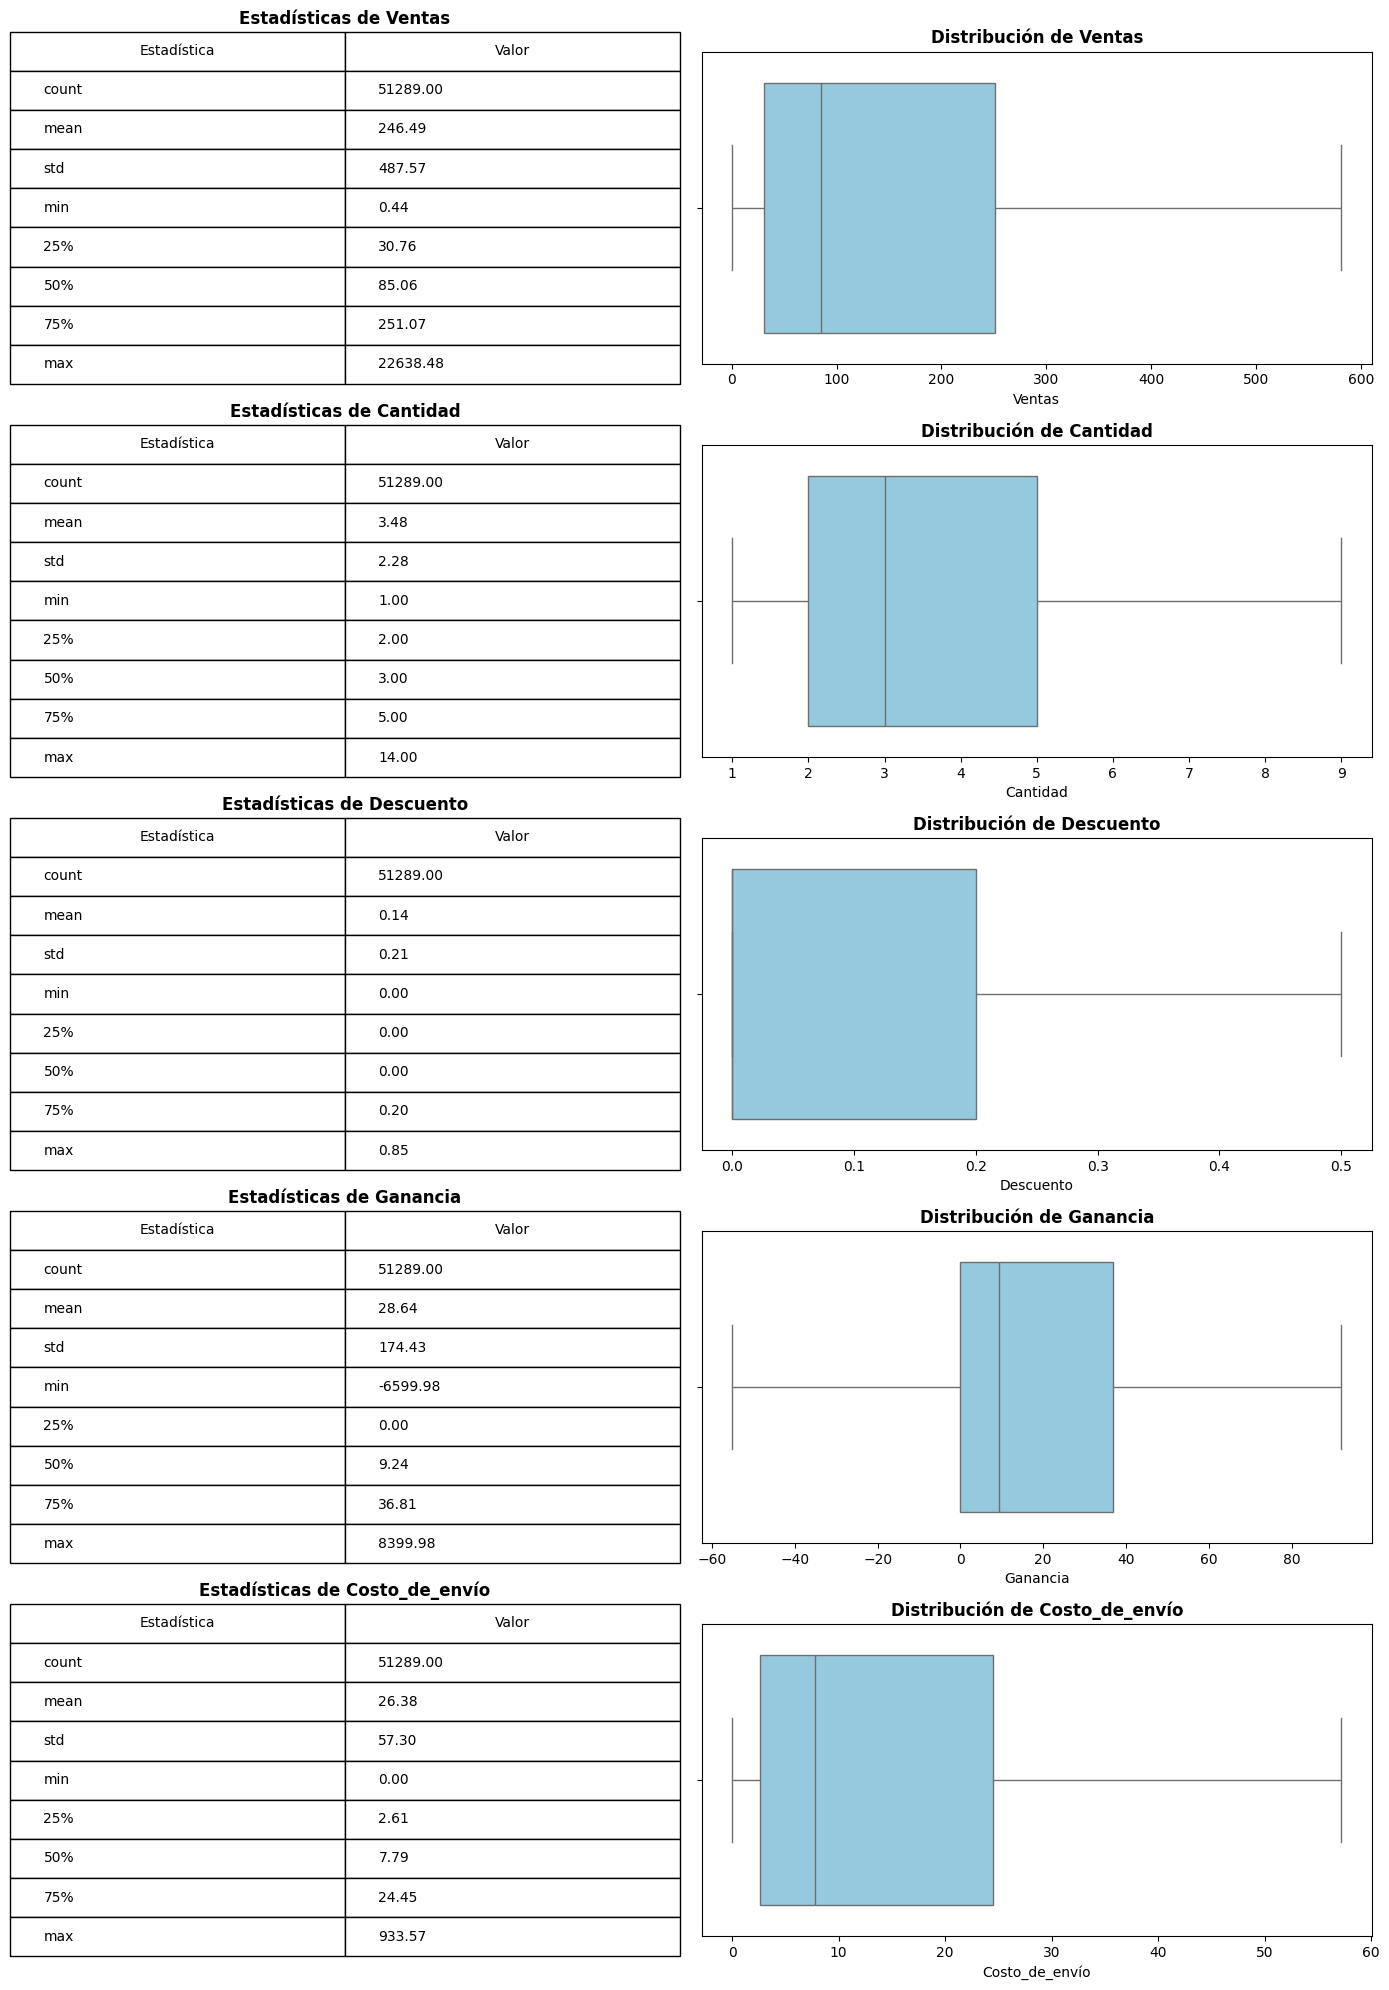

--------------------
Asimetría de Ventas: 8.1380
Asimetría de Cantidad: 1.3604
Asimetría de Descuento: 1.3877
Asimetría de Ganancia: 4.1581
Asimetría de Costo_de_envío: 5.8632


In [18]:
# Tratamiento de nulls
cols_numericas_nulas = ["Ventas", "Cantidad", "Descuento", "Ganancia", "Costo_de_envío"]

n_cols = len(cols_numericas_nulas)
fig, axes = plt.subplots(n_cols, 2, figsize=(14, 4*n_cols))


for i, col in enumerate(cols_numericas_nulas):
    # Tabla con estadísticas descriptivas
    ax_table = axes[i, 0]
    ax_table.axis('tight')
    ax_table.axis('off')

    stats = df[col].describe()
    table_data = [[f"{stat}", f"{value:.2f}"] for stat, value in stats.items()]

    table = ax_table.table(cellText=table_data,
                           colLabels=['Estadística', 'Valor'],
                           cellLoc='left',
                           loc='center',
                           colWidths=[0.5, 0.5])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2)
    ax_table.set_title(f"Estadísticas de {col}", fontsize=12, fontweight='bold', pad=20)

    # Boxplot
    ax_box = axes[i, 1]
    sns.boxplot(x=df[col], showfliers=False, color="skyblue", ax=ax_box)
    ax_box.set_title(f"Distribución de {col}", fontsize=12, fontweight='bold')
    ax_box.set_xlabel(col)

plt.tight_layout()
plt.show()
print("-"*20)


# Asimetría
for col in cols_numericas_nulas:
    print(f"Asimetría de {col}: {df[col].skew():.4f}")


Se sustituirán los valores nulos con con la mediana del conjunto de datos, dado que los datos presentan gran dispersión, mostrando una diferencia significativa entre los mínimos y máximos, lo que se refleja en una distribución poco uniforme, con valores de asimetría diferentes de 1.

Para los clientes, al ser un dato categórico, se sustituirá por un nombre genérico: Cliente_(# index)

In [19]:
# Sustitución
for col in cols_numericas_nulas:
    df[col] = df[col].fillna(df[col].median())

df["Nombre_del_cliente"] = df["Nombre_del_cliente"].fillna(
    df.index.to_series().apply(lambda x: f"Cliente_{x}")
)

Cantidad de envíos por año:  Año
2021     8998
2022    10962
2023    13799
2024    17529
2034        2
Name: count, dtype: int64


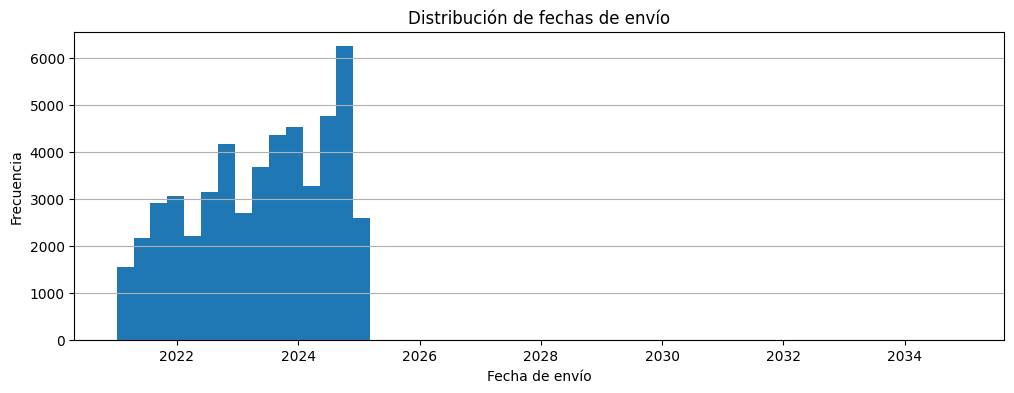

In [20]:
# Distribución de envíos por año
envios_por_año = df['Año'].value_counts().sort_index()
print("Cantidad de envíos por año: ", envios_por_año)

plt.figure(figsize=(12,4))
plt.hist(df['Fecha_de_envío'], bins=50)
plt.title("Distribución de fechas de envío")
plt.xlabel("Fecha de envío")
plt.ylabel("Frecuencia")
plt.grid(axis='y')
plt.show()

La distribución de los datos se encuentran entre el año 2021 y 2024. Existen dos valores atípicos para el 2034. Por su baja frecuencia y ausencia de continuidad temporal, se excluirán del análisis para no distorsionar tendencias y modelos.

In [21]:
# Procesamiento
df = df[df['Año'] != 2034]
df['Año'].value_counts().sort_index()

,count
Año,
2021,8998
2022,10962
2023,13799
2024,17529



Rango de fechas: 2021-01-01 00:00:00 a 2024-12-31 00:00:00
Estadística descriptiva
             Ventas      Cantidad     Descuento      Ganancia  Costo_de_envío  \
count  51288.000000  51288.000000  51288.000000  51288.000000    51288.000000   
mean     246.488845      3.476466      0.142901     28.645820       26.375796   
std      487.573842      2.278774      0.212274    174.425178       57.297839   
min        0.444000      1.000000      0.000000  -6599.978000        0.002000   
25%       30.753000      2.000000      0.000000      0.000000        2.610000   
50%       85.053000      3.000000      0.000000      9.240000        7.790000   
75%      251.024400      5.000000      0.200000     36.810000       24.450000   
max    22638.480000     14.000000      0.850000   8399.976000      933.570000   

       Dias_de_entrega  Margen_beneficio  
count     51288.000000      51288.000000  
mean          3.971241          4.745652  
std           1.730866         46.565679  
min           

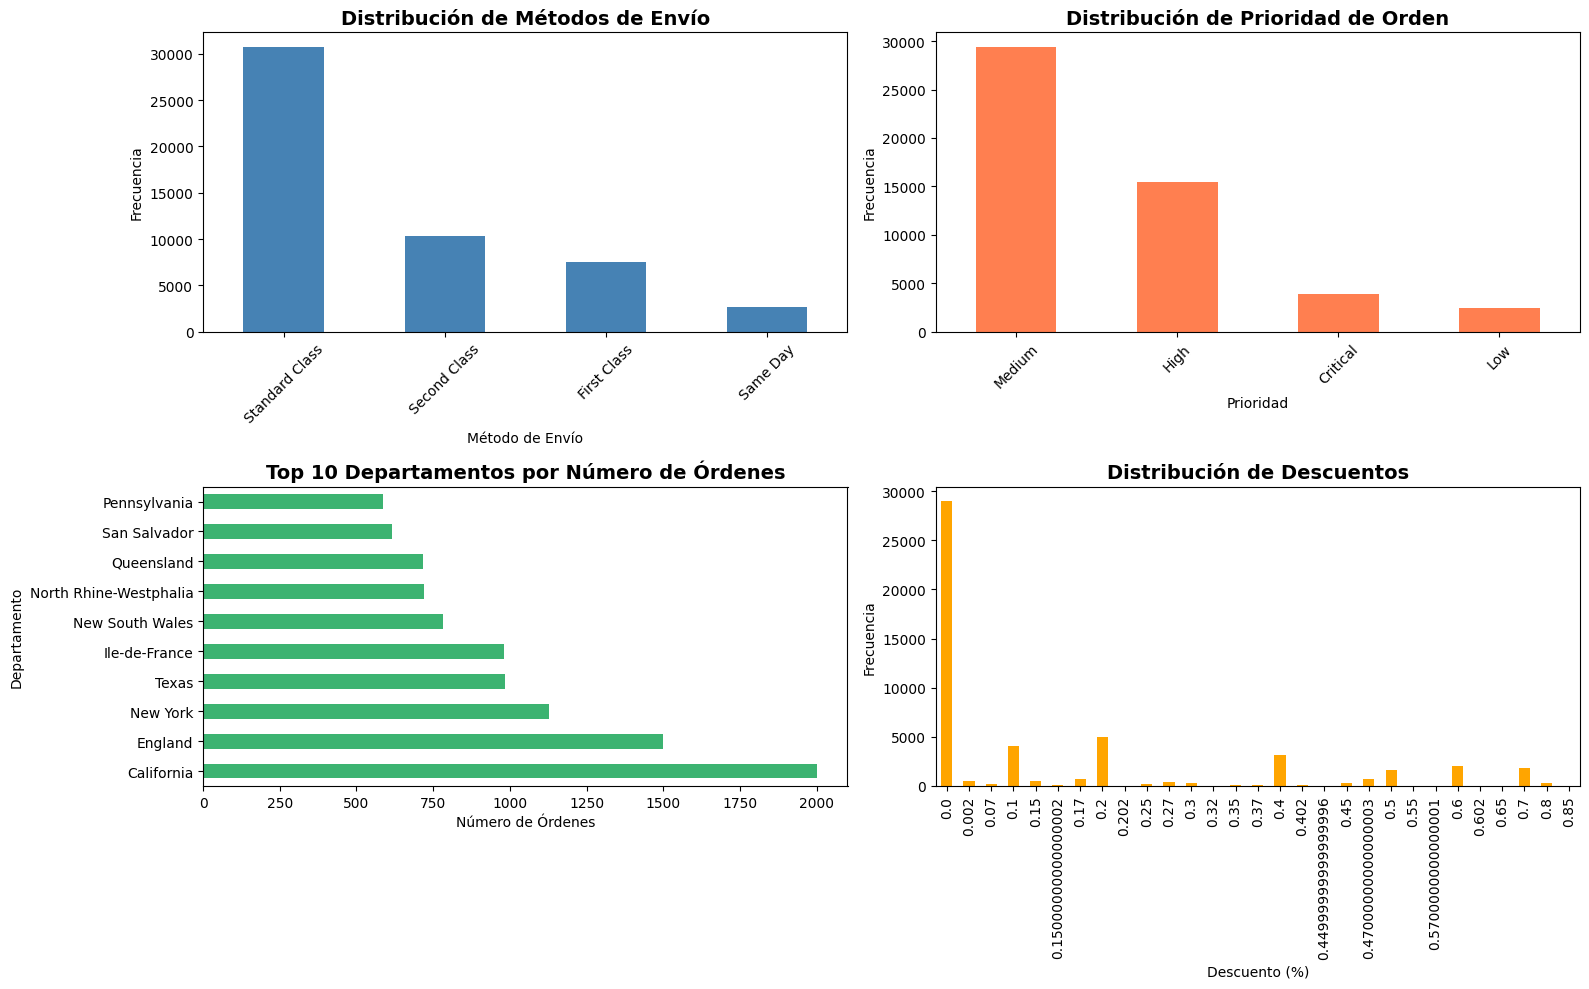

In [22]:
# Métricas adicionales
df['Margen_beneficio'] = (df['Ganancia'] / df['Ventas']) * 100
df['Precio_unitario'] = df['Ventas'] / df['Cantidad']
df['Ventas_netas'] = df['Ventas'] - df['Costo_de_envío']

print(f"\nRango de fechas: {df['Fecha_de_la_orden'].min()} a {df['Fecha_de_la_orden'].max()}")

# Análisis Exploratorio de Datos (EDA)

# Estadísticas descriptivas
print("Estadística descriptiva")
print(df[['Ventas', 'Cantidad', 'Descuento', 'Ganancia', 'Costo_de_envío',
         'Dias_de_entrega', 'Margen_beneficio']].describe())

# Distribución de variables categóricas
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

graficos = [
    {'data': df['Método_de_envío'].value_counts(), 'kind': 'bar', 'color': 'steelblue',
     'titulo': 'Distribución de Métodos de Envío', 'xlabel': 'Método de Envío', 'ylabel': 'Frecuencia', 'rotation': 45},
    {'data': df['Prioridad_de_orden'].value_counts(), 'kind': 'bar', 'color': 'coral',
     'titulo': 'Distribución de Prioridad de Orden', 'xlabel': 'Prioridad', 'ylabel': 'Frecuencia', 'rotation': 45},
    {'data': df['Estado_Departamento'].value_counts().head(10), 'kind': 'barh', 'color': 'mediumseagreen',
     'titulo': 'Top 10 Departamentos por Número de Órdenes', 'xlabel': 'Número de Órdenes', 'ylabel': 'Departamento', 'rotation': 0},
    {'data': df['Descuento'].value_counts().sort_index(), 'kind': 'bar', 'color': 'orange',
     'titulo': 'Distribución de Descuentos', 'xlabel': 'Descuento (%)', 'ylabel': 'Frecuencia', 'rotation': 0}
]

for i, config in enumerate(graficos):
    config['data'].plot(kind=config['kind'], ax=axes[i], color=config['color'])
    axes[i].set_title(config['titulo'], fontsize=14, fontweight='bold')
    axes[i].set_xlabel(config['xlabel'])
    axes[i].set_ylabel(config['ylabel'])
    if config['rotation'] > 0:
        axes[i].tick_params(axis='x', rotation=config['rotation'])

plt.tight_layout()
plt.show()

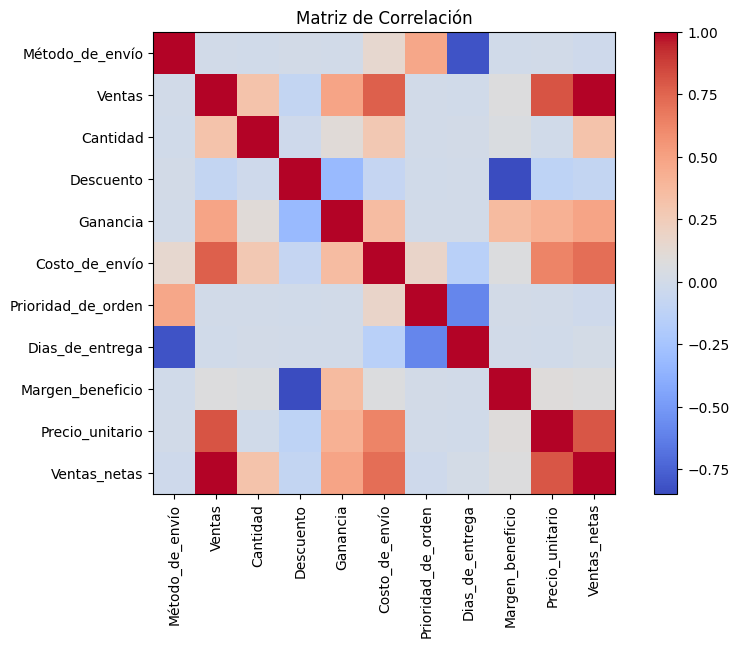

In [23]:
#Matriz de correlación

# Copia el df original
df_corr = df.copy()

# Diccionarios de codificación
envio_map = {
    "Standard Class": 1,
    "Second Class": 2,
    "First Class": 3,
    "Same Day": 4
}

prioridad_map = {
    "Low": 1,
    "Medium": 2,
    "High": 3,
    "Critical": 4
}

# Reemplazar las categorías por números
df_corr["Método_de_envío"] = df_corr["Método_de_envío"].map(envio_map)
df_corr["Prioridad_de_orden"] = df_corr["Prioridad_de_orden"].map(prioridad_map)

# Matriz de correlación (solo numéricas)
corr_matrix = df_corr.select_dtypes(include=['float64', 'int64']).corr()

corr_matrix

#Visual
plt.figure(figsize=(10, 6))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.colorbar()
plt.title("Matriz de Correlación")
plt.show()


## 1. Análisis temporal y pronóstico


### Pronóstico

In [24]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')


In [25]:
# Ventas mensuales agregadas
ventas_mensuales = df.groupby(df['Fecha_de_la_orden'].dt.to_period('M')).agg({
    'Ventas': 'sum',
    'Ganancia': 'sum',
    'ID_orden': 'count',
    'Cantidad': 'sum'
}).reset_index()
ventas_mensuales['Fecha_de_la_orden'] = ventas_mensuales['Fecha_de_la_orden'].dt.to_timestamp()
ventas_mensuales.set_index('Fecha_de_la_orden', inplace=True)

print("Series temporales")
print(f"\nPeríodo de datos: {ventas_mensuales.index.min()} a {ventas_mensuales.index.max()}")
print(f"Número de meses: {len(ventas_mensuales)}")
print(f"\nEstadísticas de Ventas Mensuales:")
print(ventas_mensuales['Ventas'].describe())

Series temporales

Período de datos: 2021-01-01 00:00:00 a 2024-12-01 00:00:00
Número de meses: 48

Estadísticas de Ventas Mensuales:
count        48.000000
mean     263373.331164
std      113868.000424
min       91152.156980
25%      175175.900230
50%      254557.774310
75%      328348.025670
max      555094.267000
Name: Ventas, dtype: float64


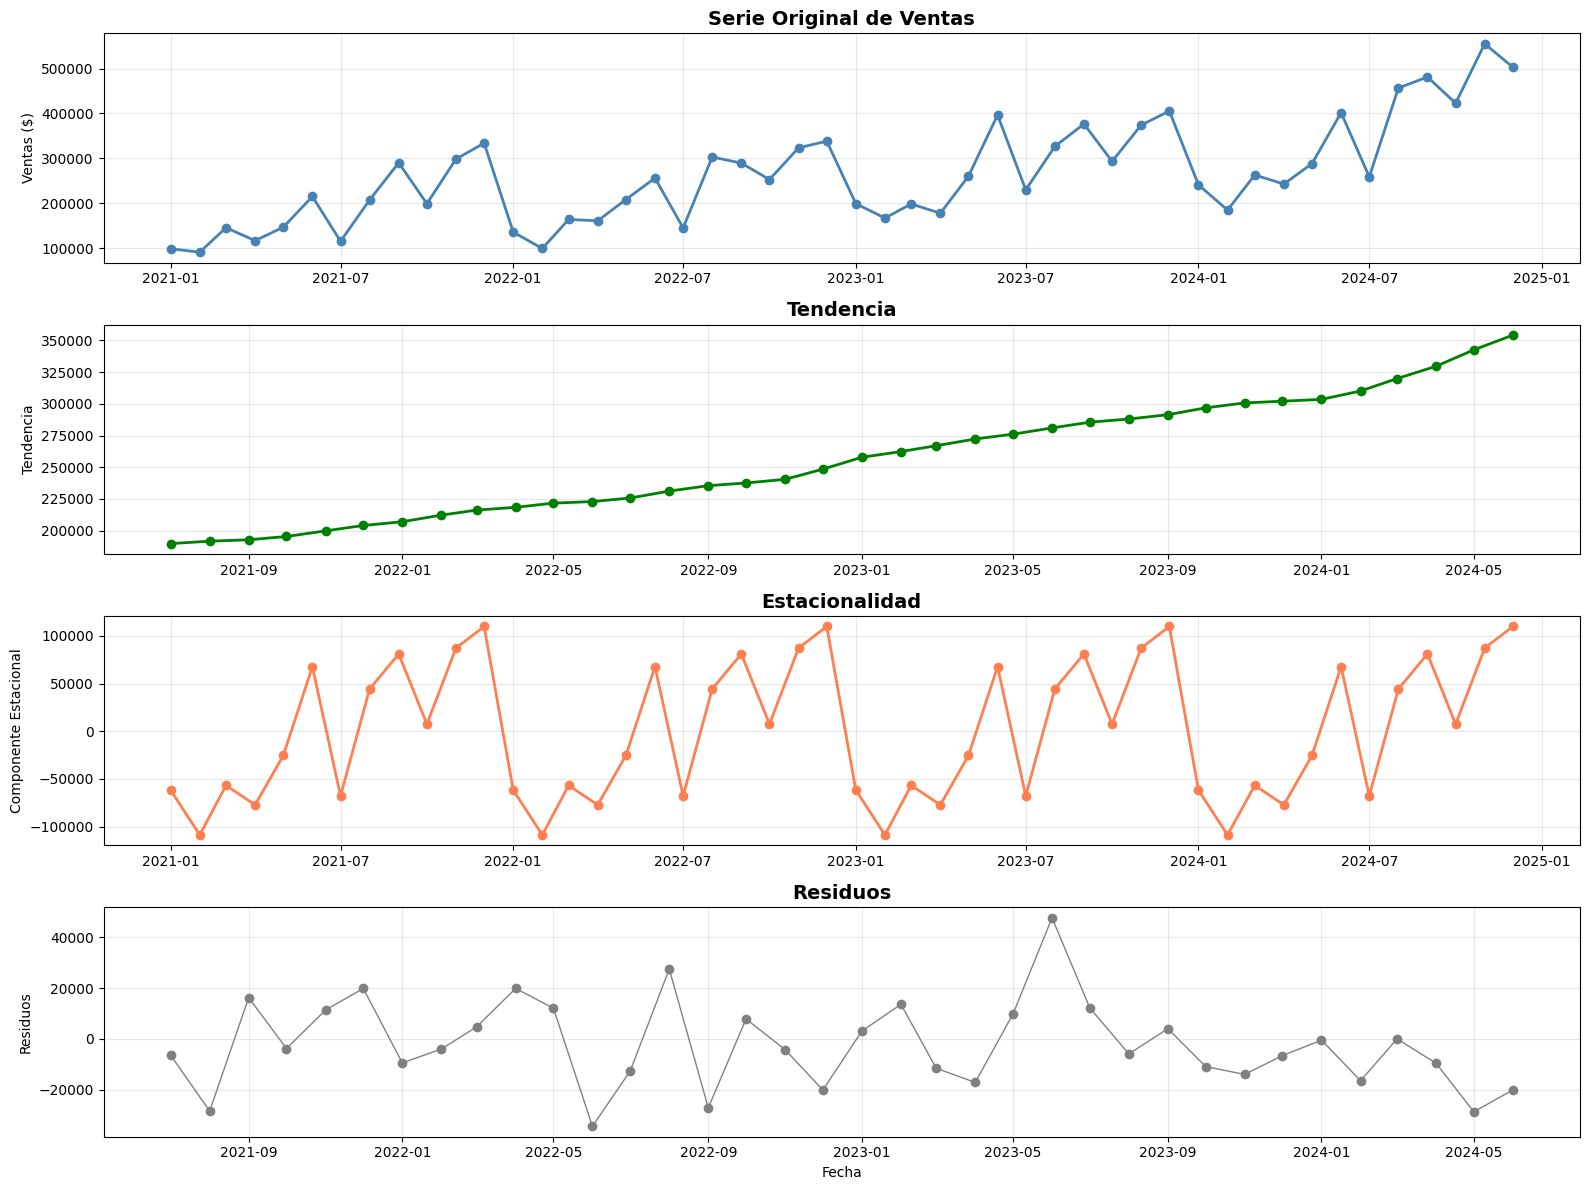

In [26]:
# Descomposición

fig, axes = plt.subplots(4, 1, figsize=(16, 12))

# Serie original
axes[0].plot(ventas_mensuales.index, ventas_mensuales['Ventas'], color='steelblue', linewidth=2, marker='o')
axes[0].set_title('Serie Original de Ventas', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Ventas ($)')
axes[0].grid(True, alpha=0.3)

# Descomposición estacional
decomposition = seasonal_decompose(ventas_mensuales['Ventas'], model='additive', period=12)

axes[1].plot(decomposition.trend.index, decomposition.trend, color='green', linewidth=2, marker='o')
axes[1].set_title('Tendencia', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Tendencia')
axes[1].grid(True, alpha=0.3)

axes[2].plot(decomposition.seasonal.index, decomposition.seasonal, color='coral', linewidth=2, marker='o')
axes[2].set_title('Estacionalidad', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Componente Estacional')
axes[2].grid(True, alpha=0.3)

axes[3].plot(decomposition.resid.index, decomposition.resid, color='gray', linewidth=1, marker='o')
axes[3].set_title('Residuos', fontsize=14, fontweight='bold')
axes[3].set_ylabel('Residuos')
axes[3].set_xlabel('Fecha')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Observamos una tendencia creciente, con un patron de picos en meses como junio, septiembre y crecimiento constantes de noviembre a diciembre, con caídas en enero y prolongación para febrero, disminución en abril y otra caída fuerte en octubre.

### Modelo pronóstico de ventas

In [28]:
# Prueba de diferentes modelos

In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import itertools

print("GRID SEARCH SARIMA")
# CONFIGURACIÓN DEL GRID SEARCH

# Train/Test split
train_size = int(len(ventas_mensuales) * 0.8)

# Parámetros de búsqueda
p_values = range(0, 3)  # AR
d_values = range(0, 2)  # Diferenciación
q_values = range(0, 3)  # MA

P_values = range(0, 3)  # AR estacional
D_values = range(0, 2)  # Diferenciación estacional
Q_values = range(0, 3)  # MA estacional
s = 12  # Estacionalidad de 12 meses

# Generar todas las combinaciones
pdq = list(itertools.product(p_values, d_values, q_values))
seasonal_pdq = list(itertools.product(P_values, D_values, Q_values, [s]))

print(f"\nTotal de combinaciones a probar: {len(pdq) * len(seasonal_pdq)}")

#Métricas

metricas_config = {
    'Ventas': {
        'columna': 'Ventas',
        'formato': '${:,.2f}',
        'unidad': ''
    },
    'Ganancia': {
        'columna': 'Ganancia',
        'formato': '${:,.2f}',
        'unidad': ''
    },
    'ID_orden': {
        'columna': 'ID_orden',
        'formato': '{:,.0f}',
        'unidad': 'órdenes'
    }
}

# Diccionario para almacenar resultados de cada métrica
resultados_por_metrica = {}

# Búsqueda por métricas

for nombre_metrica, config in metricas_config.items():
    print(f"GRID SEARCH PARA: {nombre_metrica.upper()}")

    # Preparar datos
    train = ventas_mensuales[config['columna']][:train_size]
    test = ventas_mensuales[config['columna']][train_size:]

    print(f"Train: {len(train)} meses | Test: {len(test)} meses\n")

    resultados = []
    mejor_aic = float('inf')
    mejor_modelo = None
    total_combinaciones = len(pdq) * len(seasonal_pdq)
    contador = 0

    # Probar todas las combinaciones
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                contador += 1

                # Ajustar modelo
                modelo = SARIMAX(train,
                                order=param,
                                seasonal_order=param_seasonal,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

                resultado = modelo.fit(disp=False, maxiter=200)

                # Predicciones en test
                pred = resultado.forecast(steps=len(test))

                # Calcular métricas
                mae = mean_absolute_error(test, pred)
                rmse = np.sqrt(mean_squared_error(test, pred))
                mape = np.mean(np.abs((test - pred) / test)) * 100

                # Guardar resultados
                resultados.append({
                    'SARIMA': f"{param}x{param_seasonal}",
                    'p': param[0], 'd': param[1], 'q': param[2],
                    'P': param_seasonal[0], 'D': param_seasonal[1], 'Q': param_seasonal[2],
                    'AIC': resultado.aic,
                    'BIC': resultado.bic,
                    'MAE': mae,
                    'RMSE': rmse,
                    'MAPE': mape,
                    'Log-Likelihood': resultado.llf
                })

                # Actualizar mejor modelo
                if resultado.aic < mejor_aic:
                    mejor_aic = resultado.aic
                    mejor_modelo = {
                        'order': param,
                        'seasonal_order': param_seasonal,
                        'resultado': resultado
                    }

            except Exception as e:
                continue



    # FILTRAR Y ANALIZAR RESULTADOS
    df_resultados = pd.DataFrame(resultados)

    # Filtrar modelos con problemas numéricos
    df_resultados = df_resultados.replace([np.inf, -np.inf], np.nan)
    df_resultados = df_resultados.dropna(subset=['AIC', 'BIC', 'MAPE', 'MAE'])
    df_resultados = df_resultados[
        (df_resultados['AIC'] > -100) &
        (df_resultados['AIC'] < 1000) &
        (df_resultados['BIC'] > -100) &
        (df_resultados['BIC'] < 1000) &
        (df_resultados['MAPE'] < 50)
    ]

    print(f"Modelos válidos después del filtrado: {len(df_resultados)}")

    if len(df_resultados) > 0:
        # Calcular score balanceado
        df_resultados['AIC_norm'] = (df_resultados['AIC'] - df_resultados['AIC'].min()) / \
                                     (df_resultados['AIC'].max() - df_resultados['AIC'].min())
        df_resultados['MAPE_norm'] = (df_resultados['MAPE'] - df_resultados['MAPE'].min()) / \
                                      (df_resultados['MAPE'].max() - df_resultados['MAPE'].min())
        df_resultados['Score_Balance'] = df_resultados['AIC_norm'] + df_resultados['MAPE_norm']

        # Top 5 modelos balanceados
        print(f"TOP 5 MODELOS BALANCEADOS - {nombre_metrica}")
        top_5 = df_resultados.nsmallest(5, 'Score_Balance')[['SARIMA', 'AIC', 'BIC', 'MAPE', 'MAE']]
        print(top_5.to_string(index=False))

        # Mejor modelo
        mejor_modelo_df = df_resultados.loc[df_resultados['Score_Balance'].idxmin()]

        print(f"\n")
        print(f"MEJOR MODELO PARA {nombre_metrica}")
        print(f"Modelo: {mejor_modelo_df['SARIMA']}")
        print(f"  order=({int(mejor_modelo_df['p'])}, {int(mejor_modelo_df['d'])}, {int(mejor_modelo_df['q'])})")
        print(f"  seasonal_order=({int(mejor_modelo_df['P'])}, {int(mejor_modelo_df['D'])}, {int(mejor_modelo_df['Q'])}, 12)")
        print(f"\nMétricas:")
        print(f"  AIC:  {mejor_modelo_df['AIC']:.2f}")
        print(f"  BIC:  {mejor_modelo_df['BIC']:.2f}")
        print(f"  MAPE: {mejor_modelo_df['MAPE']:.2f}%")
        print(f"  MAE:  {config['formato'].format(mejor_modelo_df['MAE'])} {config['unidad']}")

        # Guardar resultados para esta métrica
        resultados_por_metrica[nombre_metrica] = {
            'df_resultados': df_resultados,
            'mejor_modelo': mejor_modelo_df,
            'config': config
        }
    else:
        print(f"No se encontraron modelos válidos para {nombre_metrica}")
        resultados_por_metrica[nombre_metrica] = None


# COMPARACIÓN ENTRE MÉTRICAS

print("RESUMEN COMPARATIVO - MEJORES MODELOS POR MÉTRICA")

for nombre_metrica, datos in resultados_por_metrica.items():
    if datos is not None:
        mejor = datos['mejor_modelo']
        config = datos['config']
        print(f"\n{nombre_metrica}:")
        print(f"  Modelo: {mejor['SARIMA']}")
        print(f"  AIC: {mejor['AIC']:.2f} | BIC: {mejor['BIC']:.2f} | MAPE: {mejor['MAPE']:.2f}%")


# ENTRENAR MODELOS FINALES Y HACER PRONÓSTICOS

print("PRONÓSTICOS FINALES (6 MESES)")

forecast_resultados = {}

for nombre_metrica, datos in resultados_por_metrica.items():
    if datos is not None:
        print(f"\n{nombre_metrica}")

        mejor = datos['mejor_modelo']
        config = datos['config']

        # Parámetros del mejor modelo
        order = (int(mejor['p']), int(mejor['d']), int(mejor['q']))
        seasonal = (int(mejor['P']), int(mejor['D']), int(mejor['Q']), 12)

        try:
            # Entrenar con todos los datos
            modelo_final = SARIMAX(ventas_mensuales[config['columna']],
                                  order=order,
                                  seasonal_order=seasonal,
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
            resultado_final = modelo_final.fit(disp=False)

            # Pronóstico
            forecast = resultado_final.forecast(steps=6)
            forecast_ci = resultado_final.get_forecast(steps=6).conf_int()

            # Guardar resultados
            forecast_resultados[nombre_metrica] = {
                'resultado': resultado_final,
                'forecast': forecast,
                'forecast_ci': forecast_ci,
                'order': order,
                'seasonal': seasonal,
                'formato': config['formato'],
                'unidad': config['unidad']
            }

            print(f"Total pronosticado (6 meses): {config['formato'].format(forecast.sum())} {config['unidad']}")
            print(f"Promedio mensual: {config['formato'].format(forecast.mean())} {config['unidad']}")

        except Exception as e:
            print(f"Error al generar pronóstico: {e}")
            forecast_resultados[nombre_metrica] = None


GRID SEARCH SARIMA

Total de combinaciones a probar: 324
GRID SEARCH PARA: VENTAS
Train: 38 meses | Test: 10 meses

Modelos válidos después del filtrado: 236
TOP 5 MODELOS BALANCEADOS - Ventas
                 SARIMA        AIC        BIC      MAPE          MAE
(0, 1, 0)x(2, 1, 1, 12)  31.194899  23.194899  9.782515 42333.056056
(0, 0, 0)x(2, 1, 0, 12) -36.709630 -40.630189 14.506940 60819.931917
(0, 1, 0)x(2, 1, 0, 12)  29.234112  23.234112 12.658958 54756.800809
(2, 0, 0)x(1, 1, 2, 12)  35.002961  23.002961 13.239994 55450.703377
(0, 1, 2)x(2, 1, 1, 12)  34.794769  22.794769 13.447006 59434.605263


MEJOR MODELO PARA Ventas
Modelo: (0, 1, 0)x(2, 1, 1, 12)
  order=(0, 1, 0)
  seasonal_order=(2, 1, 1, 12)

Métricas:
  AIC:  31.19
  BIC:  23.19
  MAPE: 9.78%
  MAE:  $42,333.06 
GRID SEARCH PARA: GANANCIA
Train: 38 meses | Test: 10 meses

Modelos válidos después del filtrado: 210
TOP 5 MODELOS BALANCEADOS - Ganancia
                 SARIMA        AIC        BIC      MAPE          MAE
(2,

In [31]:
def mostrar_pronostico(nombre_metrica, datos, ventas_mensuales, MESES=6):
    print(f"PRONÓSTICO DE {nombre_metrica.upper()} - PRÓXIMOS {MESES} MESES")

    forecast = datos['forecast']
    forecast_ci = datos['forecast_ci']
    formato = datos['formato']
    unidad = datos['unidad']

    # Crear índice futuro
    forecast_index = pd.date_range(
        start=ventas_mensuales.index[-1] + pd.DateOffset(months=1),
        periods=MESES,
        freq='MS'
    )

    # Crear dataframe de resultado
    pronostico_df = pd.DataFrame({
        'Mes': forecast_index.strftime('%Y-%m'),
        f'{nombre_metrica}_Pronosticada': forecast.values,
        'Limite_Inferior_95%': forecast_ci.iloc[:, 0].values,
        'Limite_Superior_95%': forecast_ci.iloc[:, 1].values
    })

    print(pronostico_df.to_string(index=False))

    # Totales
    total_pronosticado = forecast.sum()
    print(f"\nTotal {nombre_metrica.lower()} pronosticado ({MESES} meses): {formato.format(total_pronosticado)} {unidad}")
    print(f"Promedio mensual pronosticado: {formato.format(total_pronosticado / MESES)} {unidad}")

    # Gráfico
    fig, ax = plt.subplots(figsize=(16, 6))

    # Dato histórico de esa métrica
    ax.plot(
        ventas_mensuales.index,
        ventas_mensuales[datos['resultado'].model.endog_names],
        label="Histórico",
        color="steelblue",
        linewidth=2
    )

    # Pronóstico
    ax.plot(
        forecast_index,
        forecast,
        label="Pronóstico",
        color="red",
        linewidth=2,
        linestyle="--",
        marker="o"
    )

    # Intervalos
    ax.fill_between(
        forecast_index,
        forecast_ci.iloc[:, 0],
        forecast_ci.iloc[:, 1],
        alpha=0.2,
        color="red",
        label="Intervalo 95%"
    )

    ax.set_title(f"Pronóstico de {nombre_metrica} - SARIMA ({MESES} meses)",
                 fontsize=14, fontweight='bold')
    ax.set_xlabel("Fecha")
    ax.set_ylabel(nombre_metrica)
    ax.grid(alpha=0.3)
    ax.legend()
    plt.tight_layout()
    plt.show()

PRONÓSTICO DE VENTAS - PRÓXIMOS 6 MESES
    Mes  Ventas_Pronosticada  Limite_Inferior_95%  Limite_Superior_95%
2025-01        460701.083157        370697.909701        550704.256614
2025-02        409591.854296        282214.082222        536969.626371
2025-03        476308.217563        320264.562117        632351.873010
2025-04        445079.189342        264873.340404        625285.038281
2025-05        550551.675485        349060.550177        752042.800794
2025-06        732972.158001        512238.836627        953705.479375

Total ventas pronosticado (6 meses): $3,075,204.18 
Promedio mensual pronosticado: $512,534.03 


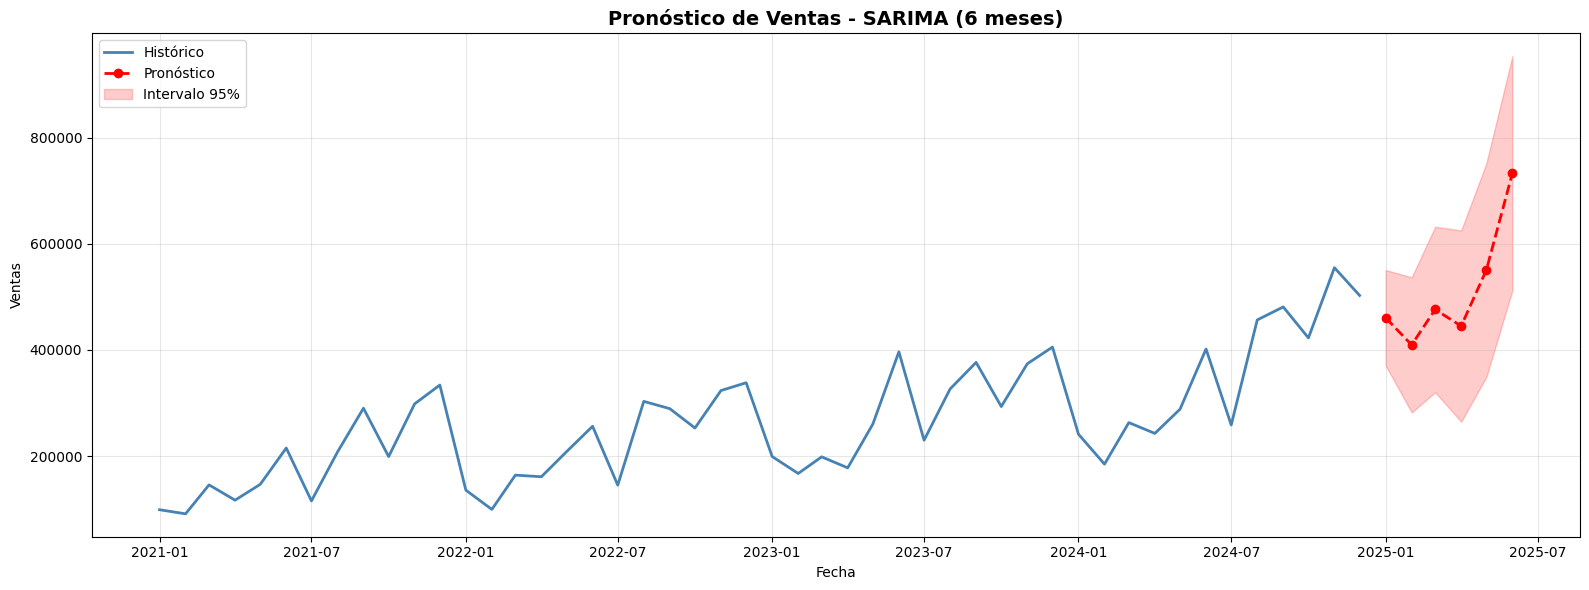

PRONÓSTICO DE GANANCIA - PRÓXIMOS 6 MESES
    Mes  Ganancia_Pronosticada  Limite_Inferior_95%  Limite_Superior_95%
2025-01           33980.788230         13049.552457         54912.024003
2025-02           33414.823780         11170.515254         55659.132306
2025-03           39203.108111         16495.971532         61910.244691
2025-04           32459.104077          9637.084657         55281.123497
2025-05           52468.705496         29613.106444         75324.304548
2025-06           71761.787394         48896.875237         94626.699550

Total ganancia pronosticado (6 meses): $263,288.32 
Promedio mensual pronosticado: $43,881.39 


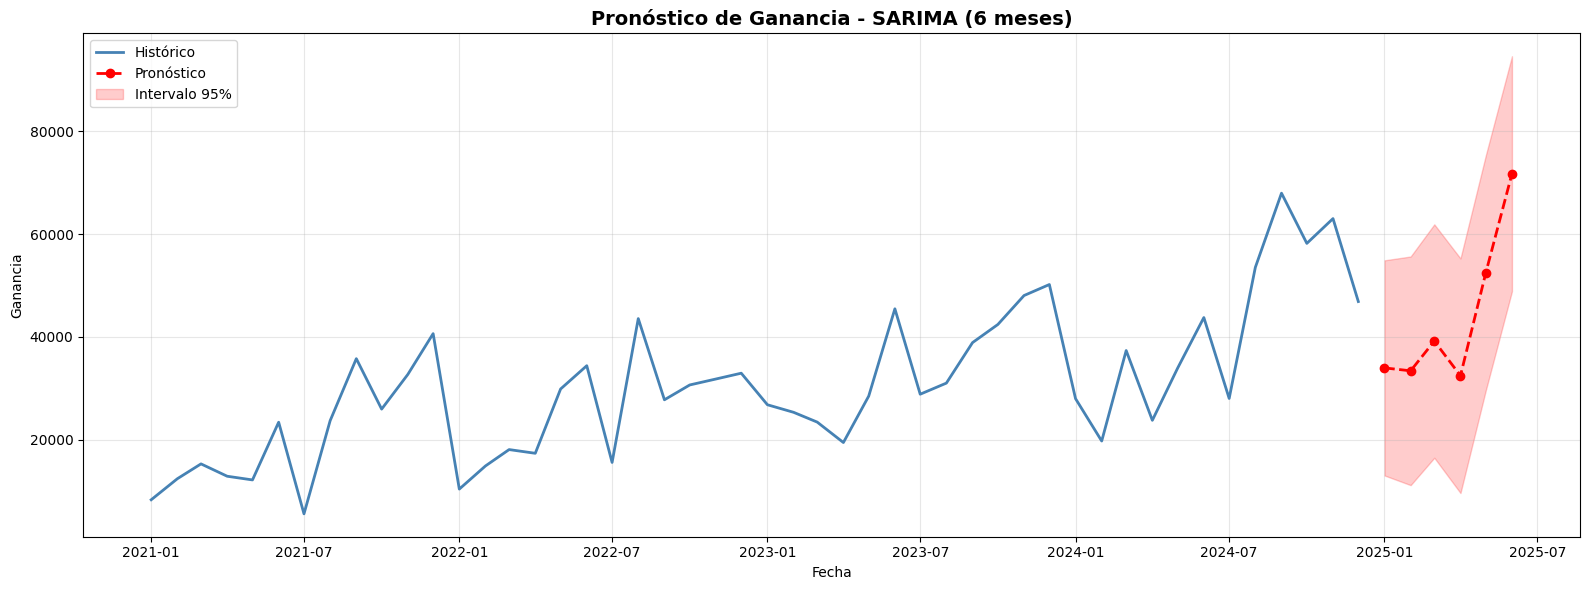

PRONÓSTICO DE ID_ORDEN - PRÓXIMOS 6 MESES
    Mes  ID_orden_Pronosticada  Limite_Inferior_95%  Limite_Superior_95%
2025-01            1504.283844          1350.728421          1657.839267
2025-02            1357.481091          1140.320929          1574.641253
2025-03            1626.646401          1360.680606          1892.612196
2025-04            1620.642238          1313.531391          1927.753084
2025-05            1868.942150          1525.581785          2212.302515
2025-06            2346.633668          1970.501234          2722.766103

Total id_orden pronosticado (6 meses): 10,325 órdenes
Promedio mensual pronosticado: 1,721 órdenes


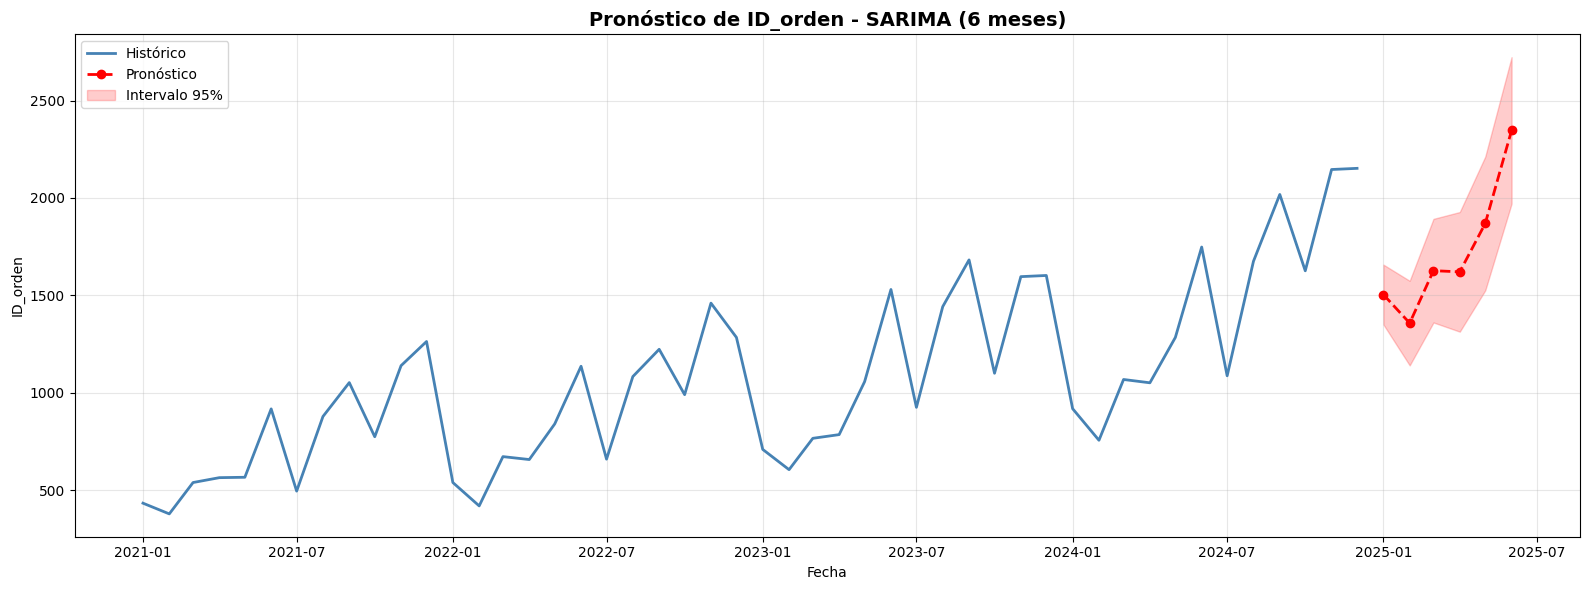

In [32]:
# Ejecutar pronósticos
MESES = 6

for nombre_metrica, datos in forecast_resultados.items():
    mostrar_pronostico(nombre_metrica, datos, ventas_mensuales, MESES)


### Segmentación de clientes

### Segmentación

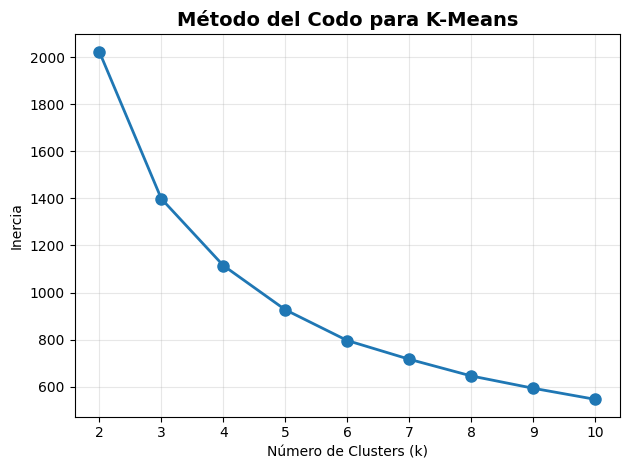

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Preparar datos para clustering
clientes_agg = df.groupby('Nombre_del_cliente').agg({
    'Ventas': 'sum',
    'Cantidad': 'sum',
    'Ganancia': 'sum',
    'ID_orden': 'count',
    'Descuento': 'mean'
}).reset_index()

clientes_agg.columns = ['Cliente', 'Ventas_totales', 'Cantidad_total',
                        'Ganancia_total', 'Num_ordenes', 'Descuento_promedio']

# Normalizar datos
scaler = StandardScaler()
features = ['Ventas_totales', 'Cantidad_total', 'Ganancia_total', 'Num_ordenes']
X_scaled = scaler.fit_transform(clientes_agg[features])

# Método del codo para encontrar k óptimo
inertias = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Método del codo
plt.plot(K_range, inertias, marker='o', linewidth=2, markersize=8)
plt.title('Método del Codo para K-Means', fontsize=14, fontweight='bold')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


4 clusters son los adecuados para este dataset

In [35]:
!pip install pyclustering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 21.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395100 sha256=4496b42f30e9dca60ee7c85904d86b7c4502d85cc3092acb12225b9287968920
  Stored in directory: /root/.cache/pip/wheels/68/29/b4/131bd7deec3663cc311ab9aa64d6517c3e3ec24bcadfc32f74
Successfully built pyclustering


In [36]:
#Prueba diferentes métodos para clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from pyclustering.cluster.kmedoids import kmedoids
import hdbscan

# llamado y escalado de datos

clientes_agg = df.groupby('Nombre_del_cliente').agg({
    'Ventas': 'sum',
    'Cantidad': 'sum',
    'Ganancia': 'sum',
    'ID_orden': 'count',
    'Descuento': 'mean'
}).reset_index()

clientes_agg.columns = ['Cliente', 'Ventas_totales', 'Cantidad_total',
                        'Ganancia_total', 'Num_ordenes', 'Descuento_promedio']

features = ['Ventas_totales', 'Cantidad_total', 'Ganancia_total', 'Num_ordenes']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(clientes_agg[features])

#Guardar métricas

def safe_metrics(X, labels):
    # Evita errores cuando hay 1 solo cluster o ruido total
    if len(set(labels)) <= 1:
        return np.nan, np.nan, np.nan

    return (
        silhouette_score(X, labels),
        calinski_harabasz_score(X, labels),
        davies_bouldin_score(X, labels)
    )

#Modelos

modelos = {
    "KMeans": KMeans(n_clusters=4, random_state=42, n_init=10),
    "GMM": GaussianMixture(n_components=4, random_state=42),
    "Agglomerative": AgglomerativeClustering(n_clusters=4, linkage='ward'),
    "Spectral": SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=42),
    "DBSCAN": DBSCAN(eps=0.7, min_samples=5),
    "HDBSCAN": hdbscan.HDBSCAN(min_cluster_size=10)
}

#Kmedoids
initial_medoids = list(np.random.choice(range(len(X_scaled)), 4, replace=False))

kmedoids_model = kmedoids(X_scaled, initial_medoids)
kmedoids_model.process()

clusters_km = kmedoids_model.get_clusters()
labels_kmedoids = np.zeros(len(X_scaled))

for i, cluster in enumerate(clusters_km):
    for idx in cluster:
        labels_kmedoids[idx] = i

modelos["KMedoids"] = "manual"


# Fit models
resultados = []

for nombre, modelo in modelos.items():

    if nombre == "KMedoids":
        labels = labels_kmedoids

    elif nombre == "GMM":
        labels = modelo.fit_predict(X_scaled)

    else:
        labels = modelo.fit_predict(X_scaled)

    sil, cal, dav = safe_metrics(X_scaled, labels)

    resultados.append({
        "Modelo": nombre,
        "Clusters_encontrados": len(set(labels)),
        "Silhouette": sil,
        "Calinski_Harabasz": cal,
        "Davies_Bouldin": dav
    })

    clientes_agg[f"Segmento_{nombre}"] = labels


df_resultados = pd.DataFrame(resultados)
df_resultados

,Modelo,Clusters_encontrados,Silhouette,Calinski_Harabasz,Davies_Bouldin
0,KMeans,4,0.307843,533.157830,0.932259
1,GMM,4,0.287612,301.417664,1.227932
2,Agglomerative,4,0.296009,468.865102,0.941859
3,Spectral,4,0.288145,491.629173,0.871399
4,DBSCAN,3,0.471437,200.377483,1.608218
5,HDBSCAN,3,0.559868,170.267780,1.372216
6,KMedoids,4,0.298134,529.800386,0.937807


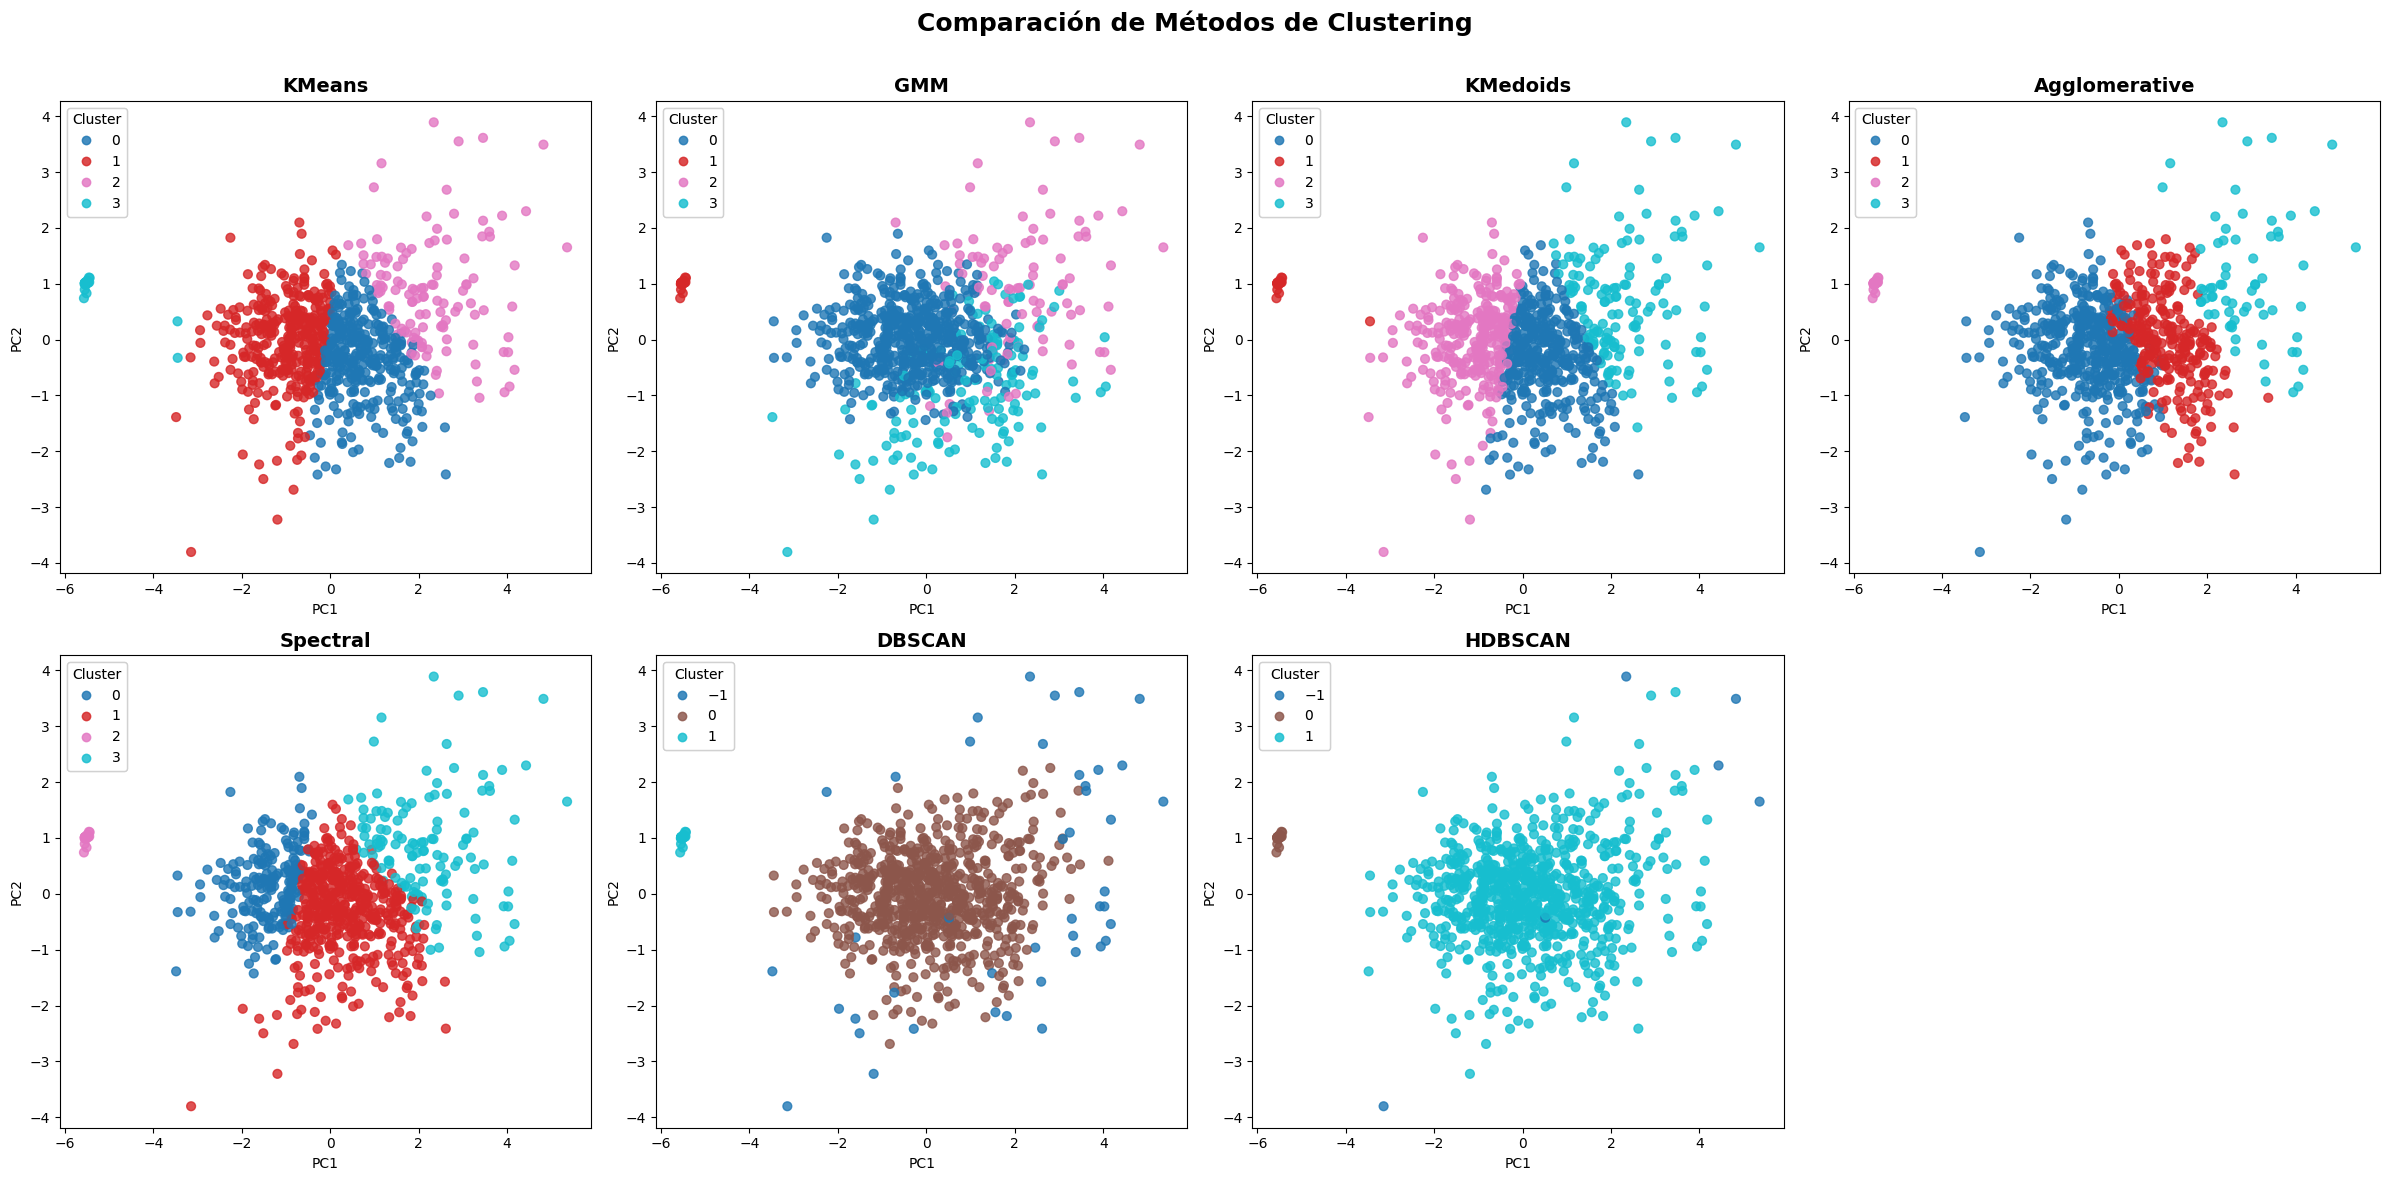

In [37]:
# Gráficas
modelos_plot = [
    "KMeans",
    "GMM",
    "KMedoids",
    "Agglomerative",
    "Spectral",
    "DBSCAN",
    "HDBSCAN"
]

# PCA para visualizar en 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

clientes_agg['PC1'] = X_pca[:, 0]
clientes_agg['PC2'] = X_pca[:, 1]

# Crear figura
fig, axes = plt.subplots(2, 4, figsize=(24, 12))
axes = axes.flatten()

for i, modelo in enumerate(modelos_plot):
    ax = axes[i]
    labels = clientes_agg[f"Segmento_{modelo}"]

    scatter = ax.scatter(
        clientes_agg['PC1'],
        clientes_agg['PC2'],
        c=labels,
        cmap='tab10',
        alpha=0.8,
        s=40
    )

    ax.set_title(modelo, fontsize=14, fontweight='bold')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')

    # Leyenda automática por cluster
    legend = ax.legend(
        *scatter.legend_elements(),
        title="Cluster",
        loc="best"
    )
    ax.add_artist(legend)

fig.delaxes(axes[-1])

plt.suptitle("Comparación de Métodos de Clustering", fontsize=18, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

Dado el resultado del coeficiente de silueta y la visual de distribución de los grupos, el mejor método para este set de datos es el Kmeans

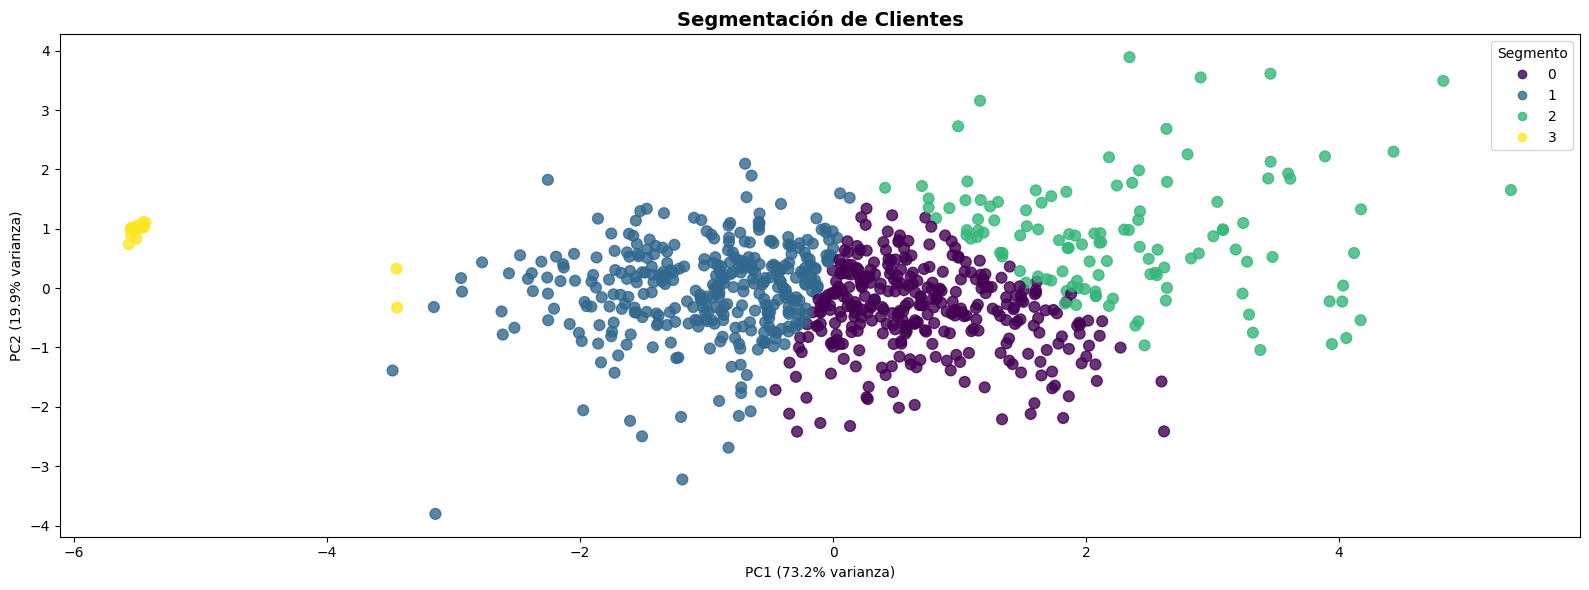

Características de los segmentos
          Num_clientes  Ventas_prom  Cantidad_prom  Ganancia_prom  \
Segmento                                                            
0                  326     17053.46         250.66        1678.69   
1                  348     12107.69         182.12        1238.13   
2                  119     23974.57         276.89        4131.90   
3                   30       534.76           8.60         -21.03   

          Ordenes_prom  Descuento_prom  
Segmento                                
0                71.72            0.15  
1                53.47            0.15  
2                77.41            0.12  
3                 2.93            0.19  


In [38]:
# K-Means
k_optimo = 4
kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
clientes_agg['Segmento'] = kmeans.fit_predict(X_scaled)

# Visualización de segmentos
plt.subplots(figsize=(16, 6))

# PCA para visualización 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clientes_agg['Segmento'],
                          cmap='viridis', s=60, alpha=0.8)
plt.title('Segmentación de Clientes', fontsize=14, fontweight='bold')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} varianza)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} varianza)')
plt.legend(*scatter.legend_elements(), title="Segmento")
plt.tight_layout()
plt.show()

# Análisis de segmentos
print("Características de los segmentos")

segmentos_info = clientes_agg.groupby('Segmento').agg({
    'Cliente': 'count',
    'Ventas_totales': 'mean',
    'Cantidad_total': 'mean',
    'Ganancia_total': 'mean',
    'Num_ordenes': 'mean',
    'Descuento_promedio': 'mean'
}).round(2)
segmentos_info.columns = ['Num_clientes', 'Ventas_prom', 'Cantidad_prom',
                          'Ganancia_prom', 'Ordenes_prom', 'Descuento_prom']
print(segmentos_info)


In [39]:
# RMF (Recencia, Frecuencia, Valor Monetario)

# Recency: días desde última compra
fecha_max = df['Fecha_de_la_orden'].max()
rfm = df.groupby('Nombre_del_cliente').agg({
    'Fecha_de_la_orden': lambda x: (fecha_max - x.max()).days,
    'ID_orden': 'count',
    'Ventas': 'sum'
}).reset_index()

rfm.columns = ['Cliente', 'Recency', 'Frequency', 'Monetary']

# PUNTAJES RFM (1–5)

rfm['R_score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1]).astype(int)
rfm['F_score'] = pd.qcut(rfm['Frequency'], 5, labels=[1,2,3,4,5]).astype(int)
rfm['M_score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5]).astype(int)

rfm['RFM_total'] = rfm[['R_score','F_score','M_score']].sum(axis=1)

# RFM a los segmentos de K-MEANS
clientes_seg = clientes_agg.merge(rfm, on='Cliente', how='left')

# Segmentos con los KPI
validacion = clientes_seg.groupby('Segmento_KMeans').agg({
    'Cliente': 'count',
    'Ventas_totales': 'mean',
    'Cantidad_total': 'mean',
    'Ganancia_total': 'mean',
    'Num_ordenes': 'mean',
    'Descuento_promedio': 'mean',

    # RFM
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'RFM_total': 'mean'
}).round(2)

validacion.columns = [
    'Num_clientes', 'Ventas_prom', 'Cantidad_prom',
    'Ganancia_prom', 'Ordenes_prom', 'Descuento_prom',
    'Recency_prom', 'Frequency_prom', 'Monetary_prom', 'RFM_prom'
]

print("VALIDACIÓN RFM DE LOS SEGMENTOS")
print(validacion)


VALIDACIÓN RFM DE LOS SEGMENTOS
                 Num_clientes  Ventas_prom  Cantidad_prom  Ganancia_prom  \
Segmento_KMeans                                                            
0                         326     17053.46         250.66        1678.69   
1                         348     12107.69         182.12        1238.13   
2                         119     23974.57         276.89        4131.90   
3                          30       534.76           8.60         -21.03   

                 Ordenes_prom  Descuento_prom  Recency_prom  Frequency_prom  \
Segmento_KMeans                                                               
0                       71.72            0.15         20.53           71.72   
1                       53.47            0.15         25.81           53.47   
2                       77.41            0.12         20.76           77.41   
3                        2.93            0.19       1170.17            2.93   

                 Monetary_prom  RFM_

Los segmentos están clasificados en la siguiente escala:

  • Clientes premium: 119 clientes, $23,974 promedio - Con alta frecuencia de compra, volumen sostenido y excelente rentabilidad. Representan el núcleo estratégico del negocio.

  • Cliente alto valor: 326 clientes, $17,053.46 promedio - Clientes valiosos y constantes, con comportamiento sólido. No tienen los niveles del segmento Premium, pero aportan ingresos estables y rentables.

  • Medio: 348 clientes, $12,107.69 promedio - Clientes de valor medio, con compras menos frecuentes y menor volumen. Son importantes porque podrían migrar a segmentos superiores con estrategias de fidelización.

  • Bajo Valor: 30 clientes, $534.76 promedio - Clientes con muy baja frecuencia y rentabilidad negativa. Pueden ser clientes esporádicos o que generan pérdidas por descuentos altos o costos asociados.

### Desempeño logístico

Tiempos de entrega por método: 
                 mean  median   std  min  max
Método_de_envío                              
First Class      2.18     2.0  0.75    0    4
Same Day         0.04     0.0  0.19    0    1
Second Class     3.23     3.0  1.17    1    6
Standard Class   5.00     5.0  1.00    3    8

Tiempos de entrega por prioridad: 
                    mean  median   std
Prioridad_de_orden                    
Critical            1.81     2.0  1.03
High                3.09     4.0  1.44
Low                 6.49     6.0  0.51
Medium              4.52     5.0  1.45

Ganancia por métodos de entrega: 
                 Ganancia  Costo_de_envío
Método_de_envío                          
First Class         27.73           41.05
Same Day            28.20           42.94
Second Class        28.55           30.47
Standard Class      28.94           19.97


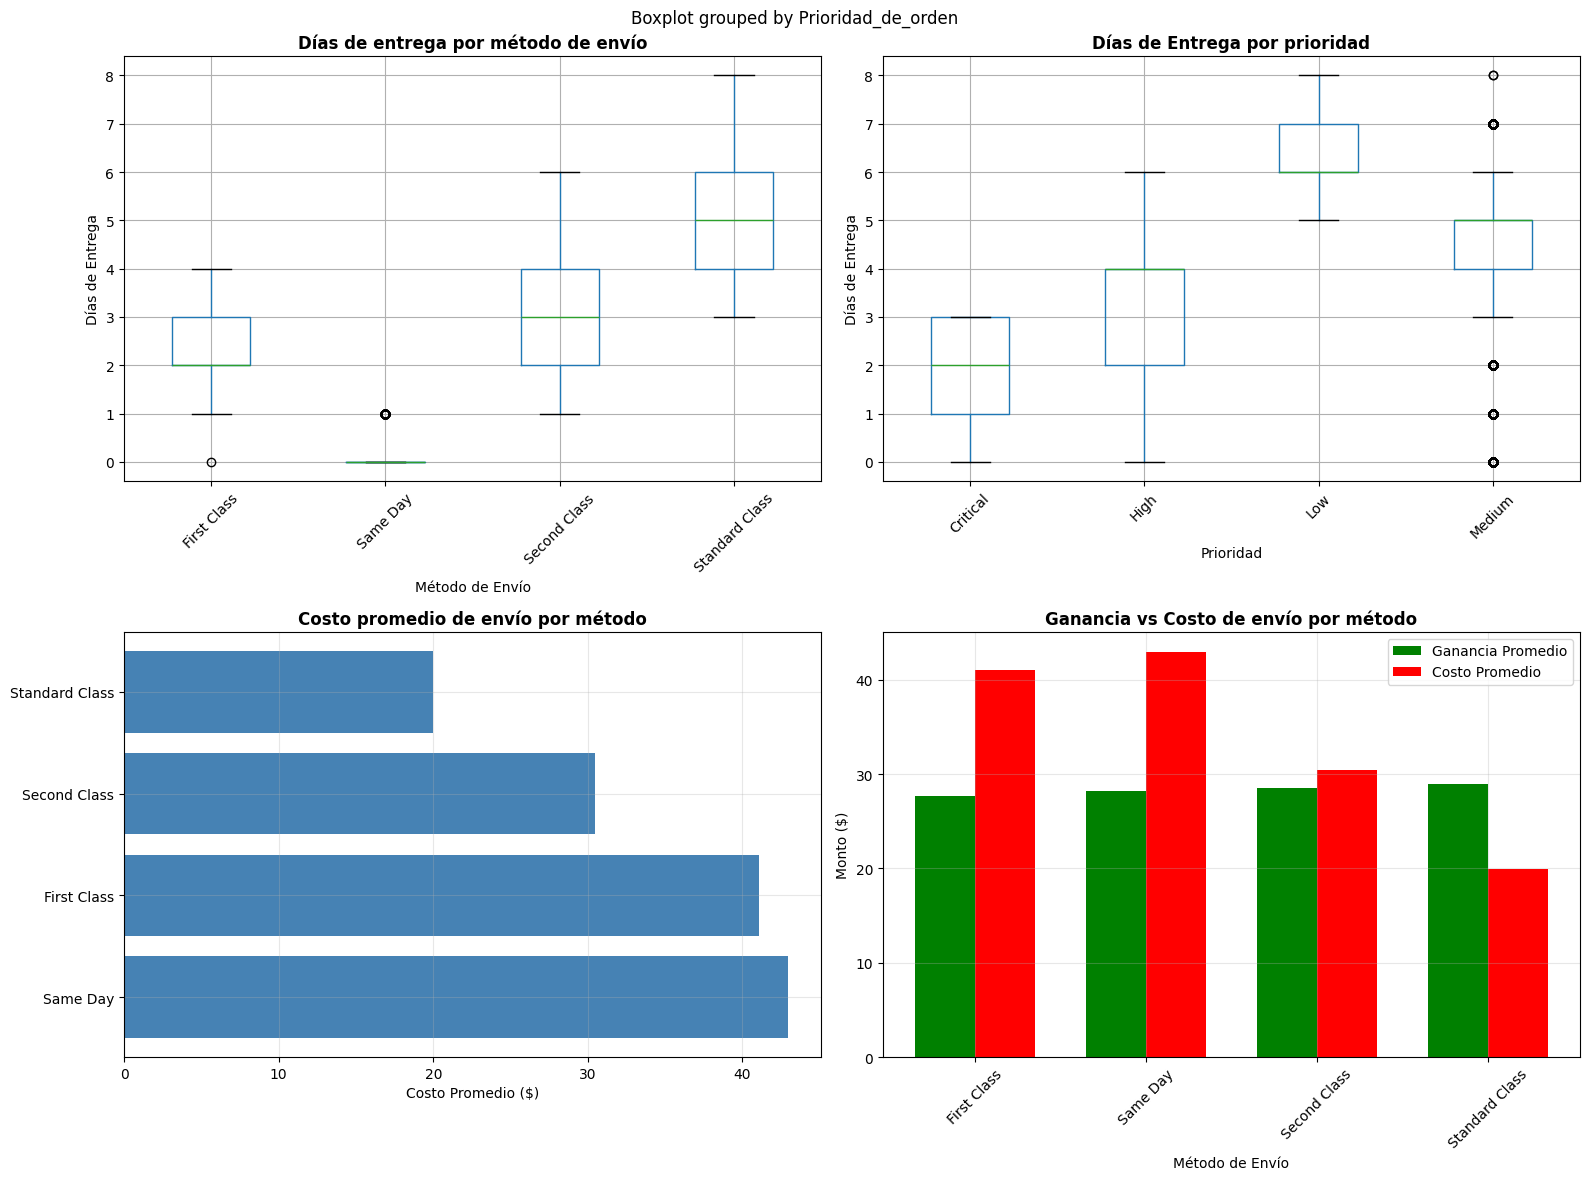

KPIs de desempeño logístico
Tiempo promedio de entrega: 3.97 días
Método más usado: Standard Class
Costo promedio de envío: $26.38


In [40]:
# Análisis de tiempos de entrega
tiempos_entrega = df.groupby('Método_de_envío')['Dias_de_entrega'].agg(['mean', 'median', 'std', 'min', 'max']).round(2)
print(f"Tiempos de entrega por método: \n{tiempos_entrega}")

# Análisis por prioridad
tiempos_prioridad = df.groupby('Prioridad_de_orden')['Dias_de_entrega'].agg(['mean', 'median', 'std']).round(2)
print(f"\nTiempos de entrega por prioridad: \n{tiempos_prioridad}")

# Análisis métodos de envio
metodos_ganancia = df.groupby('Método_de_envío').agg({'Ganancia':'mean', 'Costo_de_envío':'mean'}).round(2)
metodos_ganancia.columns = ['Ganancia', 'Costo_de_envío']
print(f"\nGanancia por métodos de entrega: \n{metodos_ganancia}")

# Visualizaciones
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Días de entrega por método de envío
df.boxplot(column='Dias_de_entrega', by='Método_de_envío', ax=axes[0, 0])
axes[0, 0].set_title('Días de entrega por método de envío', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Método de Envío')
axes[0, 0].set_ylabel('Días de Entrega')
plt.sca(axes[0, 0])
plt.xticks(rotation=45)

# Días de entrega por prioridad
df.boxplot(column='Dias_de_entrega', by='Prioridad_de_orden', ax=axes[0, 1])
axes[0, 1].set_title('Días de Entrega por prioridad', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Prioridad')
axes[0, 1].set_ylabel('Días de Entrega')
plt.sca(axes[0, 1])
plt.xticks(rotation=45)

# Costos de envío por método
costos_metodo = df.groupby('Método_de_envío')['Costo_de_envío'].mean().sort_values()
axes[1, 0].barh(range(len(costos_metodo)), costos_metodo.values, color='steelblue')
axes[1, 0].set_yticks(range(len(costos_metodo)))
axes[1, 0].set_yticklabels(costos_metodo.index)
axes[1, 0].set_title('Costo promedio de envío por método', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Costo Promedio ($)')
axes[1, 0].invert_yaxis()
axes[1, 0].grid(True, alpha=0.3)

# Eficiencia: Relación entre método y ganancia
eficiencia = df.groupby('Método_de_envío').agg({
    'Ganancia': 'mean',
    'Costo_de_envío': 'mean'
})
x = np.arange(len(eficiencia))
width = 0.35
axes[1, 1].bar(x - width/2, eficiencia['Ganancia'], width, label='Ganancia Promedio', color='green')
axes[1, 1].bar(x + width/2, eficiencia['Costo_de_envío'], width, label='Costo Promedio', color='red')
axes[1, 1].set_xlabel('Método de Envío')
axes[1, 1].set_ylabel('Monto ($)')
axes[1, 1].set_title('Ganancia vs Costo de envío por método', fontsize=12, fontweight='bold')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(eficiencia.index, rotation=45)
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# KPIs de entrega
print("KPIs de desempeño logístico")
print(f"Tiempo promedio de entrega: {df['Dias_de_entrega'].mean():.2f} días")
print(f"Método más usado: {df['Método_de_envío'].mode()[0]}")
print(f"Costo promedio de envío: ${df['Costo_de_envío'].mean():.2f}")

### Análisis económico y rentabilidad

In [41]:
import matplotlib.gridspec as gridspec

Rentabilidad
Ventas Totales: $12,641,919.90
Ganancias Totales: $1,469,186.84
Margen de Beneficio Global: 11.62%
Número Total de Órdenes: 51,288
Venta Promedio por Orden: $246.49
Ganancia Promedio por Orden: $28.65
Impacto de los descuentos en la rentabilidad: 

               Ventas             Ganancia          Margen_beneficio ID_orden
                  sum     mean         sum     mean             mean    count
Descuento                                                                    
0.000      6992013.70   241.04  1770671.75    61.04            26.49    29008
0.002       261395.62   567.02    57976.58   125.76            22.87      461
0.070       121616.85   810.78    21148.50   140.99            17.76      150
0.100      1579606.37   388.30   260641.71    64.07            16.47     4068
0.150       283879.86   618.47    26096.56    56.86             8.68      459
0.150        22149.99   270.12     1279.35    15.60            12.61       82
0.170       247399.20   336.60    28

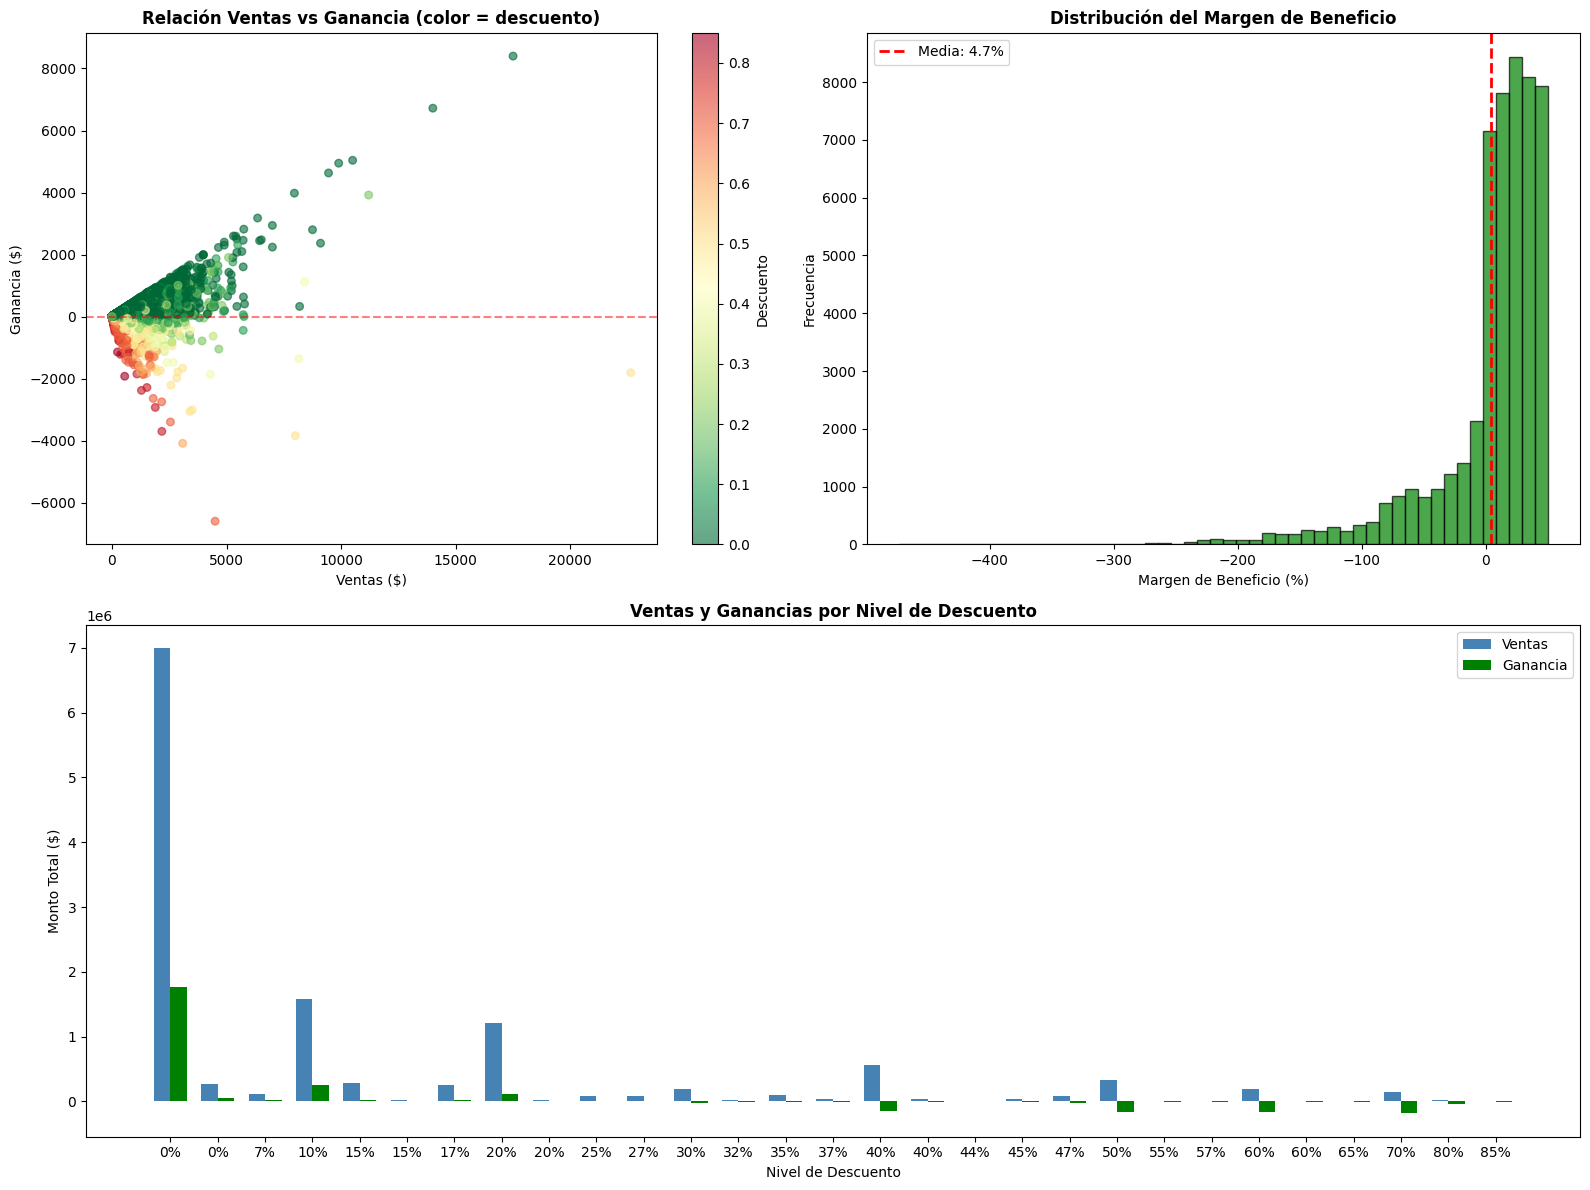


 Órdenes con pérdidas: 12542 (24.5%)
Pérdida total acumulada: $-920,181.85
Descuento promedio en órdenes con pérdida: 45.1%


In [42]:
# Análisis de rentabilidad
print("Rentabilidad")

# Métricas globales
ventas_totales = df['Ventas'].sum()
ganancias_totales = df['Ganancia'].sum()
margen_global = (ganancias_totales / ventas_totales) * 100

print(f"Ventas Totales: ${ventas_totales:,.2f}")
print(f"Ganancias Totales: ${ganancias_totales:,.2f}")
print(f"Margen de Beneficio Global: {margen_global:.2f}%")
print(f"Número Total de Órdenes: {len(df):,}")
print(f"Venta Promedio por Orden: ${df['Ventas'].mean():,.2f}")
print(f"Ganancia Promedio por Orden: ${df['Ganancia'].mean():,.2f}")

# Impacto de descuentos
analisis_descuentos = df.groupby('Descuento').agg({
    'Ventas': ['sum', 'mean'],
    'Ganancia': ['sum', 'mean'],
    'Margen_beneficio': 'mean',
    'ID_orden': 'count'
}).round(2)
print("Impacto de los descuentos en la rentabilidad: \n")
print(analisis_descuentos)

# Crear figura con GridSpec
fig = plt.figure(figsize=(16, 12))
gs = gridspec.GridSpec(2, 2, figure=fig)

# Relación Ventas vs Ganancia
ax1 = fig.add_subplot(gs[0, 0])
scatter = ax1.scatter(df['Ventas'], df['Ganancia'],
                      c=df['Descuento'], cmap='RdYlGn_r', alpha=0.6, s=30)
ax1.set_title('Relación Ventas vs Ganancia (color = descuento)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Ventas ($)')
ax1.set_ylabel('Ganancia ($)')
ax1.axhline(y=0, color='red', linestyle='--', alpha=0.5)
plt.colorbar(scatter, ax=ax1, label='Descuento')

# Distribución de margen de beneficio
ax2 = fig.add_subplot(gs[0, 1])
ax2.hist(df['Margen_beneficio'], bins=50, color='green', alpha=0.7, edgecolor='black')
ax2.axvline(df['Margen_beneficio'].mean(), color='red', linestyle='--',
            linewidth=2, label=f'Media: {df["Margen_beneficio"].mean():.1f}%')
ax2.set_title('Distribución del Margen de Beneficio', fontsize=12, fontweight='bold')
ax2.set_xlabel('Margen de Beneficio (%)')
ax2.set_ylabel('Frecuencia')
ax2.legend()

ax_big = fig.add_subplot(gs[1, :])  # ocupa (1,0) y (1,1)

desc_agrupado = df.groupby('Descuento').agg({'Ventas': 'sum', 'Ganancia': 'sum'})
x = np.arange(len(desc_agrupado))
width = 0.35

ax_big.bar(x - width/2, desc_agrupado['Ventas'], width, label='Ventas', color='steelblue')
ax_big.bar(x + width/2, desc_agrupado['Ganancia'], width, label='Ganancia', color='green')

ax_big.set_xlabel('Nivel de Descuento')
ax_big.set_ylabel('Monto Total ($)')
ax_big.set_title('Ventas y Ganancias por Nivel de Descuento', fontsize=12, fontweight='bold')
ax_big.set_xticks(x)
ax_big.set_xticklabels([f'{int(d*100)}%' for d in desc_agrupado.index])
ax_big.legend()

plt.tight_layout()
plt.show()

# Análisis de pérdidas
ordenes_perdida = df[df['Ganancia'] < 0]
print(f"\n Órdenes con pérdidas: {len(ordenes_perdida)} ({len(ordenes_perdida)/len(df)*100:.1f}%)")
print(f"Pérdida total acumulada: ${ordenes_perdida['Ganancia'].sum():,.2f}")
print(f"Descuento promedio en órdenes con pérdida: {ordenes_perdida['Descuento'].mean()*100:.1f}%")

TOP 10 PRODUCTOS POR VENTAS
           ID_producto                                    Nombre_producto  \
8969   TEC-CO-10004722              Canon imageCLASS 2200 Advanced Copier   
10156  TEC-PH-10004664                  Nokia Smart Phone, with Caller ID   
3825   OFF-BI-10003527  Fellowes PB500 Electric Punch Plastic Comb Bin...   
9294   TEC-MA-10002412  Cisco TelePresence System EX90 Videoconferenci...   
10170  TEC-PH-10004823                       Nokia Smart Phone, Full Size   
708    FUR-CH-10002024       HON 5400 Series Task Chairs for Big and Tall   
518    FUR-CH-10000027            SAFCO Executive Leather Armchair, Black   
2752   OFF-AP-10004512                                  Hoover Stove, Red   
2008   FUR-TA-10001889  Bush Advantage Collection Racetrack Conference...   
3568   OFF-BI-10001359         GBC DocuBind TL300 Electric Binding System   

                    Categoría       Subcategoría  Ventas_totales  \
8969               Tecnología     Fotocopiadoras        

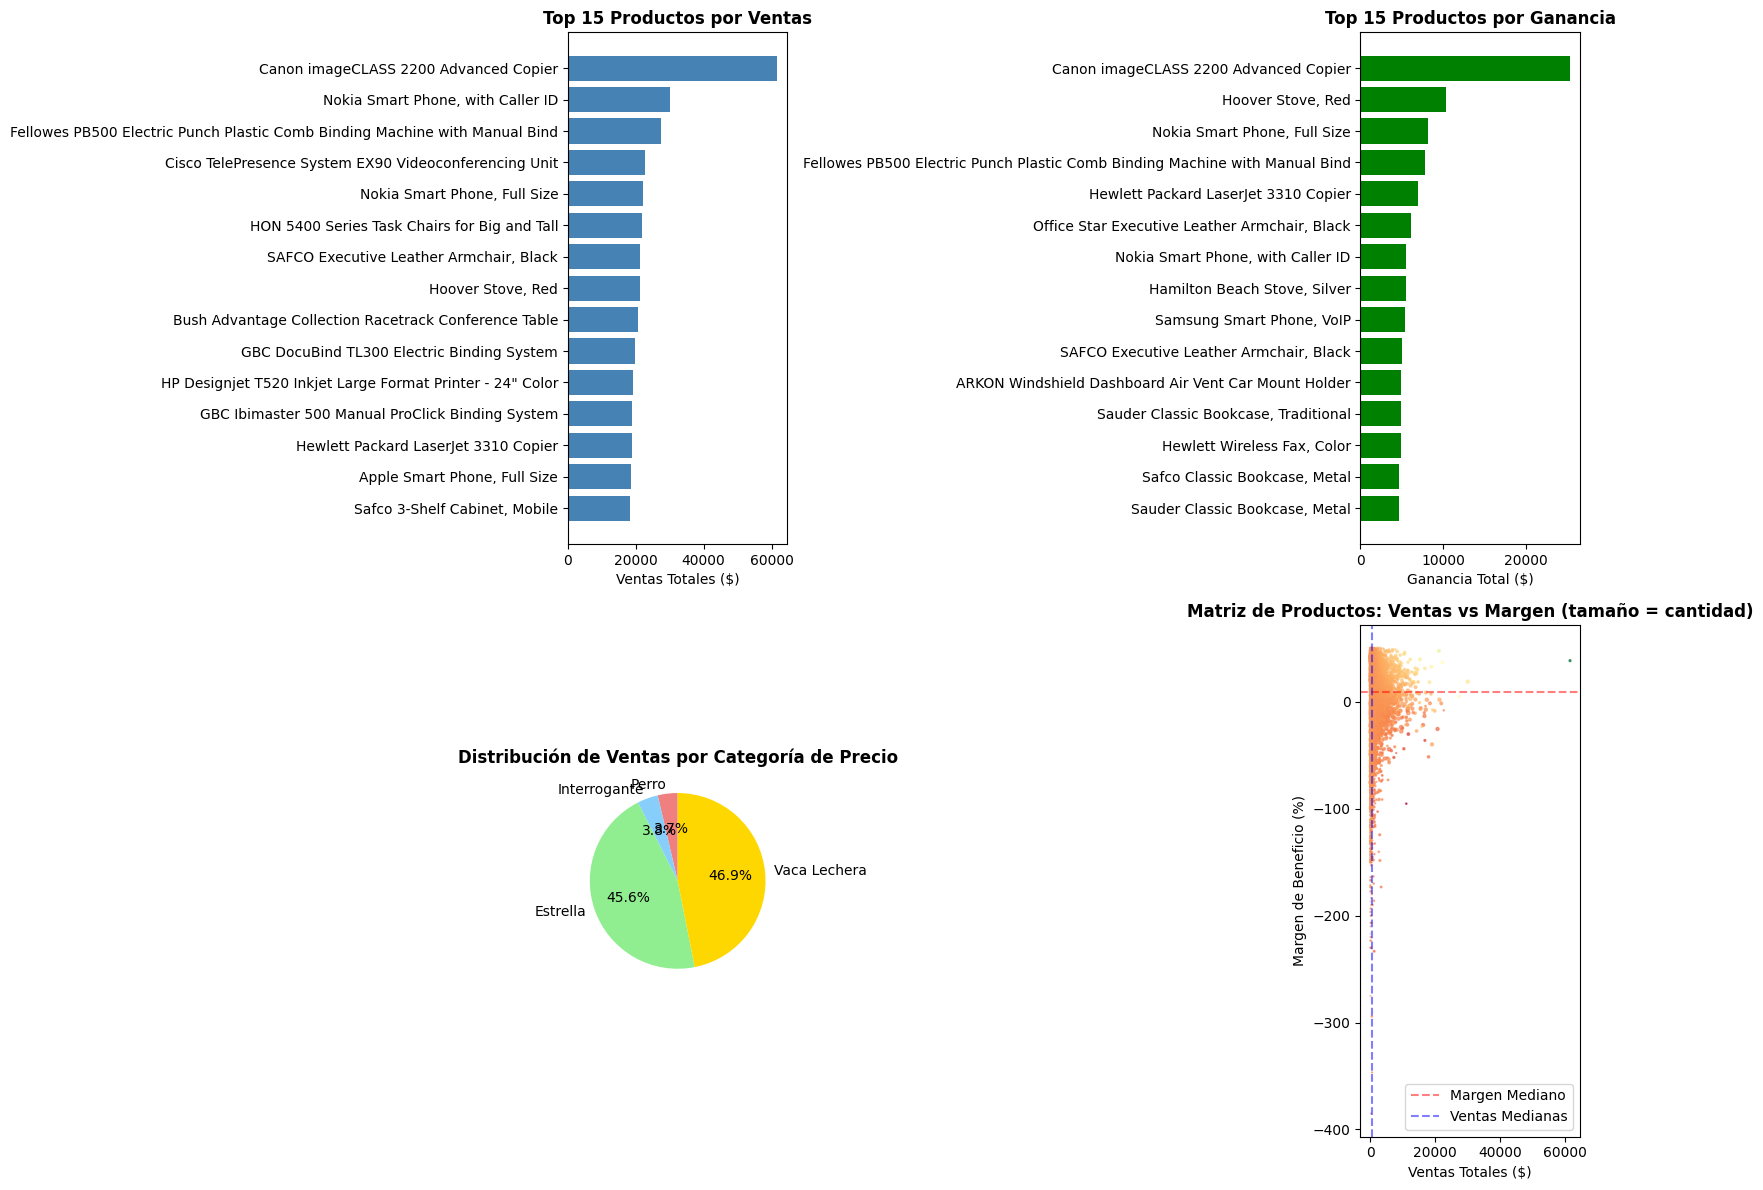



MATRIZ BCG DE PRODUCTOS
Categoria_BCG
Perro            179.655412
Interrogante     187.554690
Estrella        2241.794046
Vaca Lechera    2303.413420
Name: Ventas_totales, dtype: float64


In [43]:
# Análisis por producto
db_producto = (producto.drop_duplicates(subset=['ID_producto', 'Categoría']))

df_producto = df.merge(db_producto, on='ID_producto', how='left')

productos_top = df_producto.groupby(['ID_producto', 'Nombre_producto', 'Categoría', 'Subcategoría']).agg({
    'Ventas': 'sum',
    'Ganancia': 'sum',
    'Cantidad': 'sum',
    'ID_orden': 'count',
    'Margen_beneficio': 'mean'
}).round(2)

productos_top.columns = ['Ventas_totales', 'Ganancia_total', 'Cantidad_vendida',
                         'Num_ordenes', 'Margen_promedio']
productos_top.reset_index(inplace=True)
productos_top = productos_top.sort_values('Ventas_totales', ascending=False)

print("TOP 10 PRODUCTOS POR VENTAS")
print(productos_top.head(10))

# Identificar productos estrella, vacas lecheras, interrogantes y perros
mediana_ventas = productos_top['Ventas_totales'].median()
mediana_margen = productos_top['Margen_promedio'].median()

productos_top['Categoria_BCG'] = 'Interrogante'
productos_top.loc[(productos_top['Ventas_totales'] >= mediana_ventas) &
                  (productos_top['Margen_promedio'] >= mediana_margen), 'Categoria_BCG'] = 'Estrella'
productos_top.loc[(productos_top['Ventas_totales'] >= mediana_ventas) &
                  (productos_top['Margen_promedio'] < mediana_margen), 'Categoria_BCG'] = 'Vaca Lechera'
productos_top.loc[(productos_top['Ventas_totales'] < mediana_ventas) &
                  (productos_top['Margen_promedio'] < mediana_margen), 'Categoria_BCG'] = 'Perro'

# Visualizaciones de productos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top 15 productos por ventas
top_15_ventas = productos_top.head(15)
axes[0, 0].barh(top_15_ventas['Nombre_producto'], top_15_ventas['Ventas_totales'], color='steelblue')
axes[0, 0].set_title('Top 15 Productos por Ventas', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Ventas Totales ($)')
axes[0, 0].invert_yaxis()

# Top 15 productos por ganancia
top_15_ganancia = productos_top.sort_values('Ganancia_total', ascending=False).head(15)
axes[0, 1].barh(top_15_ganancia['Nombre_producto'], top_15_ganancia['Ganancia_total'], color='green')
axes[0, 1].set_title('Top 15 Productos por Ganancia', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Ganancia Total ($)')
axes[0, 1].invert_yaxis()

# Ventas por categoría de precio
promedio_ventas_bcg = productos_top.groupby('Categoria_BCG')['Ventas_totales'].mean().sort_values()
axes[1, 0].pie(promedio_ventas_bcg, labels=promedio_ventas_bcg.index, autopct='%1.1f%%', startangle=90,
               colors=['lightcoral', 'lightskyblue', 'lightgreen', 'gold'])
axes[1, 0].set_title('Distribución de Ventas por Categoría de Precio', fontsize=12, fontweight='bold')

# Matriz de productos: Ventas vs Margen
axes[1, 1].scatter(productos_top['Ventas_totales'], productos_top['Margen_promedio'],
                   s=productos_top['Cantidad_vendida']/10, alpha=0.6, c=productos_top['Ganancia_total'],
                   cmap='RdYlGn')
axes[1, 1].axhline(y=productos_top['Margen_promedio'].median(), color='red',
                   linestyle='--', alpha=0.5, label='Margen Mediano')
axes[1, 1].axvline(x=productos_top['Ventas_totales'].median(), color='blue',
                   linestyle='--', alpha=0.5, label='Ventas Medianas')
axes[1, 1].set_title('Matriz de Productos: Ventas vs Margen (tamaño = cantidad)',
                     fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Ventas Totales ($)')
axes[1, 1].set_ylabel('Margen de Beneficio (%)')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

print("\n")
print("MATRIZ BCG DE PRODUCTOS")
print(promedio_ventas_bcg)



ANÁLISIS POR DEPARTAMENTO
                        Ventas_sum  Ventas_mean  Ventas_count  Ganancia_sum  \
Estado_Departamento                                                           
England                  485170.97       323.66          1499      99907.73   
California               457687.63       228.73          2001      76381.39   
Ile-de-France            317822.54       323.98           981      44055.92   
New York                 310876.27       275.60          1128      74038.55   
New South Wales          270487.10       346.33           781      45273.51   
Queensland               238312.73       332.37           717      21608.75   
North Rhine-Westphalia   216451.85       301.05           719      42347.87   
Texas                    170188.05       172.78           985     -25729.36   
San Salvador             153639.40       249.82           615      35883.38   
National Capital         152175.36       261.02           583     -13066.08   

                       

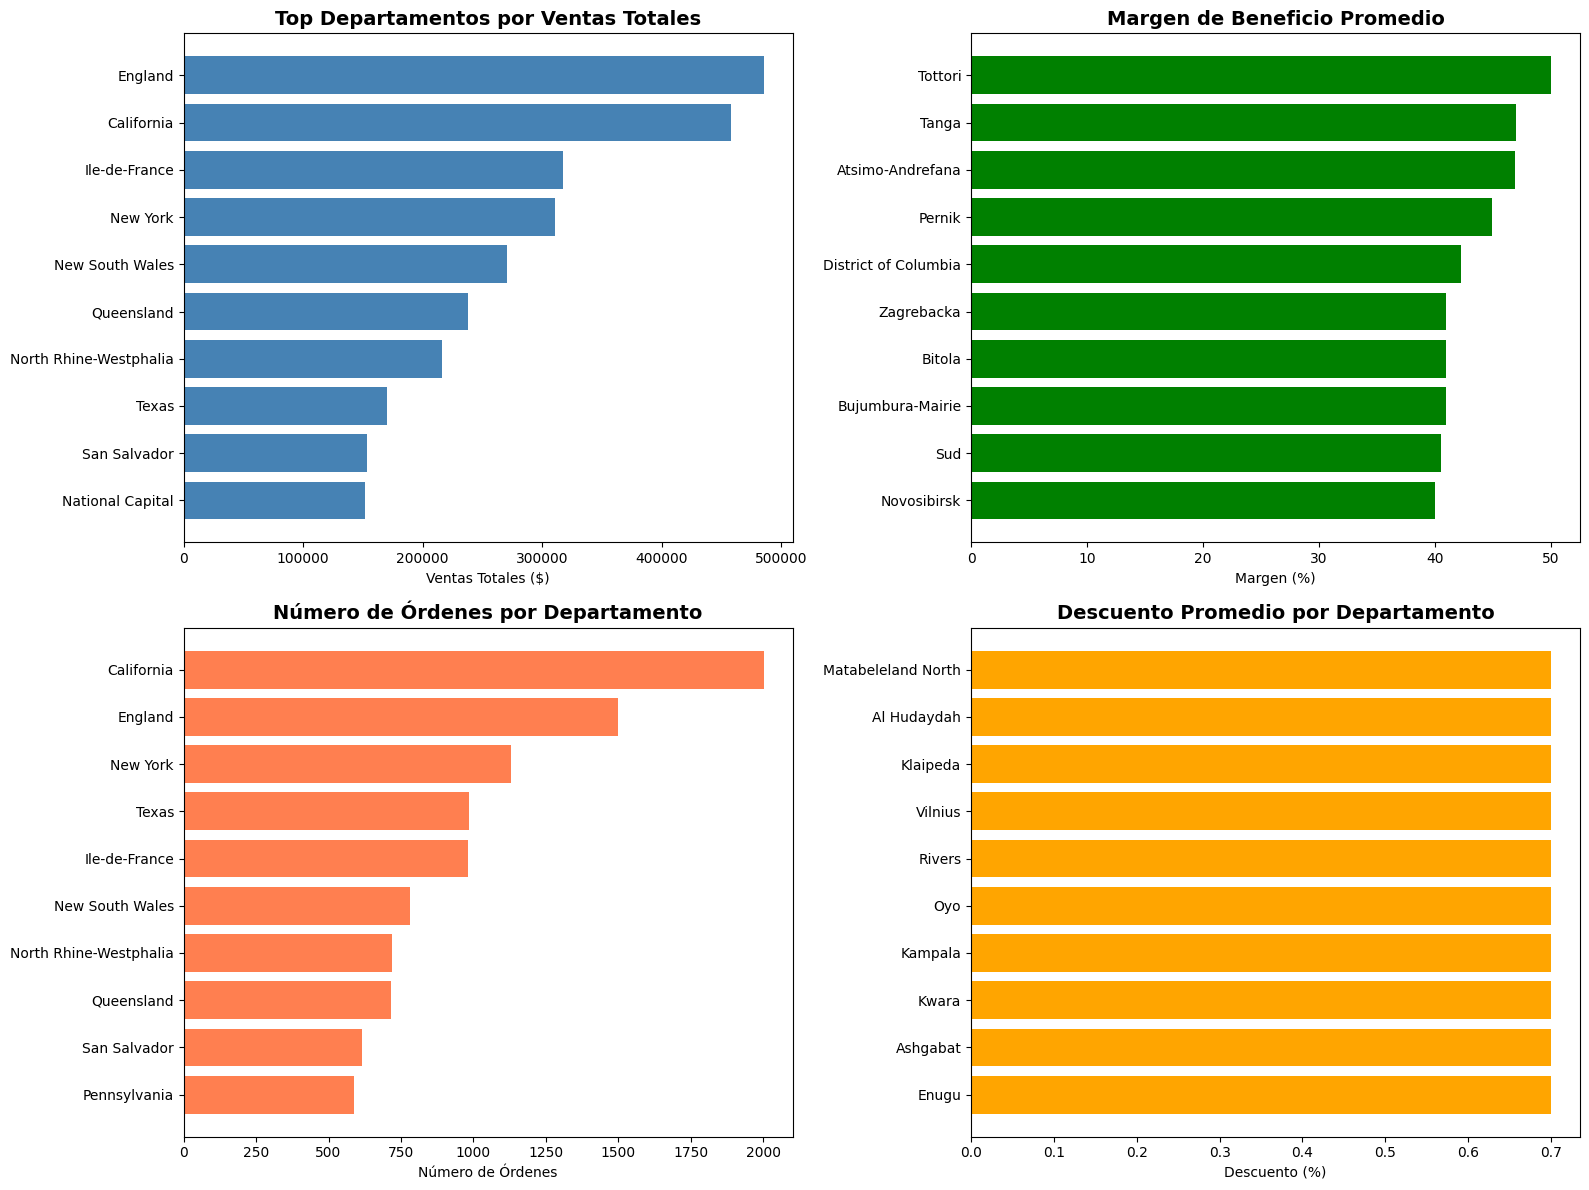

In [33]:
# Análisis por departamento
analisis_regional = df.groupby('Estado_Departamento').agg({
    'Ventas': ['sum', 'mean', 'count'],
    'Ganancia': ['sum', 'mean'],
    'Descuento': 'mean',
    'Margen_beneficio': 'mean'
}).round(2)

analisis_regional.columns = ['_'.join(col).strip() for col in analisis_regional.columns.values]
analisis_regional = analisis_regional.sort_values('Ventas_sum', ascending=False)

print("\n")
print("ANÁLISIS POR DEPARTAMENTO")
print(analisis_regional.head(10))

# Visualización geográfica
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

metricas = [
    ('Ventas_sum', 'steelblue', 'Top Departamentos por Ventas Totales', 'Ventas Totales ($)'),
    ('Margen_beneficio_mean', 'green', 'Margen de Beneficio Promedio', 'Margen (%)'),
    ('Ventas_count', 'coral', 'Número de Órdenes por Departamento', 'Número de Órdenes'),
    ('Descuento_mean', 'orange', 'Descuento Promedio por Departamento', 'Descuento (%)')
]

for i, (col, color, titulo, xlabel) in enumerate(metricas):

    ordenado = analisis_regional[col].sort_values(ascending=False).head(10)

    axes[i].barh(ordenado.index, ordenado.values, color=color)
    axes[i].set_title(titulo, fontsize=14, fontweight='bold')
    axes[i].set_xlabel(xlabel)
    axes[i].invert_yaxis()  # el más alto arriba

plt.tight_layout()
plt.show()

Análisis geográfico


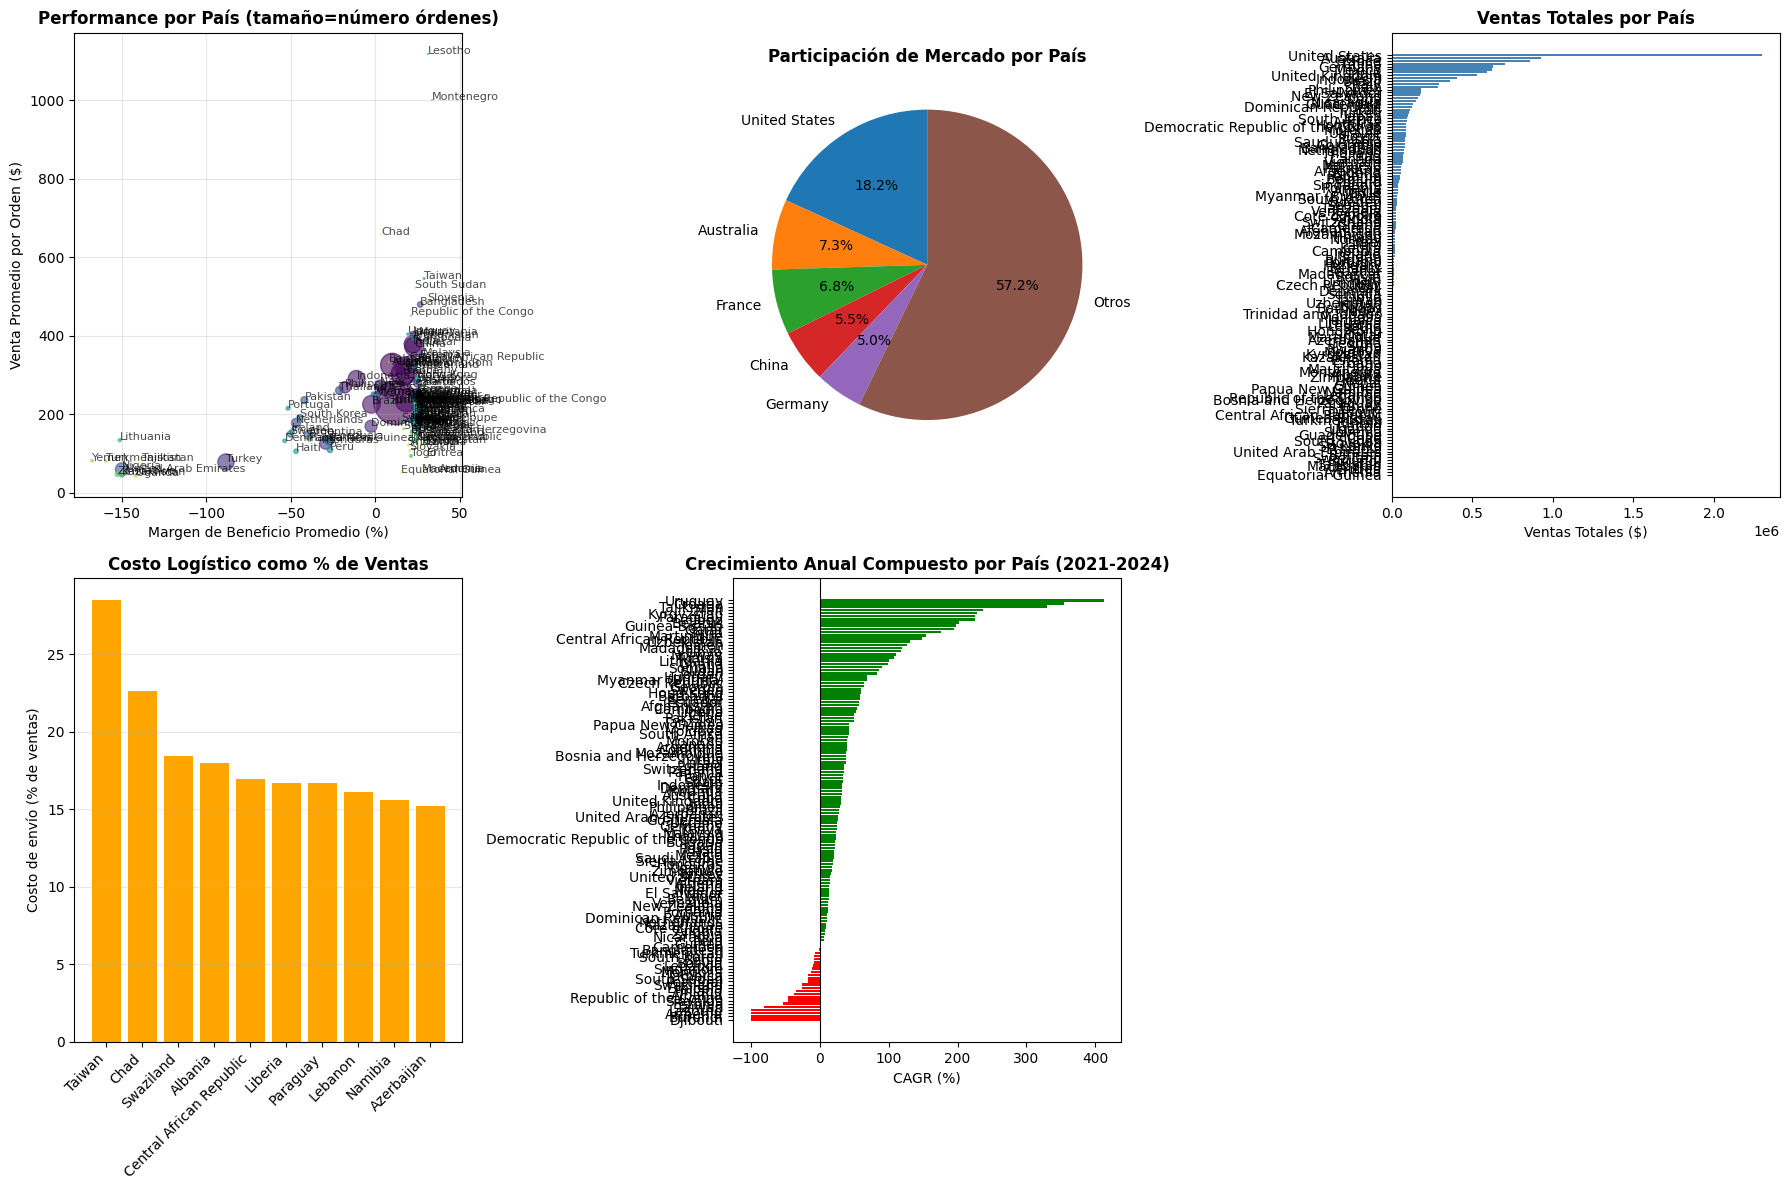

In [44]:
print("Análisis geográfico")

df_geo = df.copy()

# Análisis por país
pais_agg = df_geo.groupby('País').agg({
    'Ventas': ['sum', 'mean'],
    'Ganancia': ['sum', 'mean'],
    'ID_orden': 'count',
    'Costo_de_envío': 'mean',
    'Dias_de_entrega': 'mean',
    'Margen_beneficio': 'mean'
}).round(2)
pais_agg.columns = ['_'.join(col) for col in pais_agg.columns]
pais_agg = pais_agg.sort_values('Ventas_sum', ascending=False)

# Índice de concentración
ventas_pais = df_geo.groupby('País')['Ventas'].sum()
market_share = (ventas_pais / ventas_pais.sum()) * 100
hhi = (market_share ** 2).sum()


# Crecimiento por región
ventas_año_pais = df_geo.groupby(['País', 'Año'])['Ventas'].sum().unstack(fill_value=0)
años_disponibles = sorted(ventas_año_pais.columns)

if len(años_disponibles) > 1:
    n_años = len(años_disponibles) - 1
    cagr_por_pais = {}
    for pais in ventas_año_pais.index:
        valor_inicial = ventas_año_pais.loc[pais, años_disponibles[0]]
        valor_final = ventas_año_pais.loc[pais, años_disponibles[-1]]
        if valor_inicial > 0:
            cagr = ((valor_final / valor_inicial) ** (1/n_años) - 1) * 100
            cagr_por_pais[pais] = cagr

    cagr_df = pd.DataFrame.from_dict(cagr_por_pais, orient='index', columns=['CAGR_%'])
    cagr_df = cagr_df.sort_values('CAGR_%', ascending=False)

# Costos logísticos
logistica_pais = df_geo.groupby('País').agg({
    'Costo_de_envío': ['mean', 'sum'],
    'Dias_de_entrega': 'mean',
    'Ventas': 'sum'
}).round(2)
logistica_pais.columns = ['_'.join(col) for col in logistica_pais.columns]
logistica_pais['Costo_pct_ventas'] = (logistica_pais['Costo_de_envío_sum'] /
                                      logistica_pais['Ventas_sum'] * 100).round(2)

# Visuales
fig = plt.figure(figsize=(18, 12))

# Mapa de burbujas por país
ax1 = plt.subplot(2, 3, 1)
pais_plot = pais_agg.reset_index()
scatter = ax1.scatter(pais_plot['Margen_beneficio_mean'], pais_plot['Ventas_mean'],
                      s=pais_plot['ID_orden_count']/10, alpha=0.6,
                      c=range(len(pais_plot)), cmap='viridis')
for idx, row in pais_plot.iterrows():
    ax1.annotate(row['País'], (row['Margen_beneficio_mean'], row['Ventas_mean']),
                fontsize=8, alpha=0.7)
ax1.set_xlabel('Margen de Beneficio Promedio (%)')
ax1.set_ylabel('Venta Promedio por Orden ($)')
ax1.set_title('Performance por País (tamaño=número órdenes)', fontweight='bold')
ax1.grid(alpha=0.3)

# Participación de mercado
ax2 = plt.subplot(2, 3, 2)
top5_paises = market_share.nlargest(5)
otros = market_share[~market_share.index.isin(top5_paises.index)].sum()
if otros > 0:
    plot_data = pd.concat([top5_paises, pd.Series({'Otros': otros})])
else:
    plot_data = top5_paises
ax2.pie(plot_data, labels=plot_data.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Participación de Mercado por País', fontweight='bold')

# Ventas por país
ax3 = plt.subplot(2, 3, 3)
ventas_pais_sorted = ventas_pais.sort_values()
ax3.barh(range(len(ventas_pais_sorted)), ventas_pais_sorted.values, color='steelblue')
ax3.set_yticks(range(len(ventas_pais_sorted)))
ax3.set_yticklabels(ventas_pais_sorted.index)
ax3.set_xlabel('Ventas Totales ($)')
ax3.set_title('Ventas Totales por País', fontweight='bold')

# Costos logísticos vs Ventas por país
ax5 = plt.subplot(2, 3, 4)
paises_log = logistica_pais.sort_values('Costo_pct_ventas', ascending=False).head(10)
x = np.arange(len(paises_log))
ax5.bar(x, paises_log['Costo_pct_ventas'], color='orange')
ax5.set_xticks(x)
ax5.set_xticklabels(paises_log.index, rotation=45, ha='right')
ax5.set_ylabel('Costo de envío (% de ventas)')
ax5.set_title('Costo Logístico como % de Ventas', fontweight='bold')
ax5.grid(axis='y', alpha=0.3)

# Crecimiento anual por país
ax6 = plt.subplot(2, 3, 5)
if len(años_disponibles) > 1:
    cagr_sorted = cagr_df.sort_values('CAGR_%')
    colors = ['green' if x > 0 else 'red' for x in cagr_sorted['CAGR_%']]
    ax6.barh(range(len(cagr_sorted)), cagr_sorted['CAGR_%'], color=colors)
    ax6.set_yticks(range(len(cagr_sorted)))
    ax6.set_yticklabels(cagr_sorted.index)
    ax6.set_xlabel('CAGR (%)')
    ax6.set_title(f'Crecimiento Anual Compuesto por País ({años_disponibles[0]}-{años_disponibles[-1]})',
                  fontweight='bold')
    ax6.axvline(0, color='black', linewidth=0.8)
else:
    ax6.text(0.5, 0.5, 'Datos insuficientes para CAGR', ha='center', va='center')
    ax6.axis('off')

plt.tight_layout()
plt.show()


Exportar bases de datos

In [45]:
def crear_tabla_pronostico(ventas_mensuales, forecast_resultados, meses=6):

    # Histórico
    historico_lista = []

    for metrica in ['Ventas', 'Ganancia', 'ID_orden']:
        df_hist = pd.DataFrame({
            'Fecha': ventas_mensuales.index,
            'Metrica': metrica,
            'Valor_Real': ventas_mensuales[metrica],
            'Valor_Pronosticado': np.nan,
            'Limite_Inferior_95': np.nan,
            'Limite_Superior_95': np.nan,
            'Tipo': 'Histórico'
        })
        historico_lista.append(df_hist)

    df_historico = pd.concat(historico_lista, ignore_index=True)

    # Pronósticos
    pronosticos_lista = []

    for nombre_metrica, datos in forecast_resultados.items():
        if datos is not None:
            forecast_index = pd.date_range(
                start=ventas_mensuales.index[-1] + pd.DateOffset(months=1),
                periods=meses,
                freq='MS'
            )

            forecast = datos['forecast']
            forecast_ci = datos['forecast_ci']

            df_pron = pd.DataFrame({
                'Fecha': forecast_index,
                'Metrica': nombre_metrica,
                'Valor_Real': np.nan,
                'Valor_Pronosticado': forecast.values,
                'Limite_Inferior_95': forecast_ci.iloc[:, 0].values,
                'Limite_Superior_95': forecast_ci.iloc[:, 1].values,
                'Tipo': 'Pronóstico'
            })
            pronosticos_lista.append(df_pron)

    df_pronosticos = pd.concat(pronosticos_lista, ignore_index=True)

    # Combinar histórico + pronósticos
    df_completo = pd.concat([df_historico, df_pronosticos], ignore_index=True)
    df_completo = df_completo.sort_values(['Metrica', 'Fecha']).reset_index(drop=True)

    return df_completo

In [46]:
df_completo = crear_tabla_pronostico(ventas_mensuales, forecast_resultados, meses=6)

In [47]:
# Exportacion datasets
with pd.ExcelWriter('datos_powerbi.xlsx', engine='openpyxl') as writer:
    # DataFrame principal procesado
    df.to_excel(writer, sheet_name='Ordenes_Procesadas', index=False)

    # Ventas mensuales
    ventas_mensuales.to_excel(writer, sheet_name='Ventas_Mensuales')

    # Segmentación de clientes
    clientes_agg.to_excel(writer, sheet_name='Clientes_Segmentados', index=False)

    # RFM
    rfm.to_excel(writer, sheet_name='RFM', index=False)

    #Pronosticos
    df_completo.to_excel(writer, sheet_name='Serie_Completa', index=False)

    # Productos agregados
    productos_top.to_excel(writer, sheet_name='Productos_top', index=False)
